In [1]:
# I import the modules I will need.
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

First indicator that I look at : Total number of new entrants in the first grade of primary education, 
regardless of age, expressed as a percentage of the population at the official primary school-entrance age. 
A high GIR indicates a high degree of access to primary education. As this calculation includes all new entrants 
in Grade 1 (regardless of age), the ratio can exceed 100% due to over-aged and under-aged children entering 
primary school for the first time.
I do that for both females and males and then I export the data to do a plot in Tableau.

In [2]:
'''Firstly, I read the API data for females. I add an extra column to indicate the gender.''' 

response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.GINT.FE.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['country'])))
df['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['indicator'])))
df = df.dropna()
df['Gender'] = 'Female'

In [3]:
'''I do the same for males - I read the data and add a column indicating the gender.'''
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.GINT.MA.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df2 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df2['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['country'])))
df2['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['indicator'])))
df2 = df2.dropna()
df2['Gender'] = 'Male'

In [4]:
'''I can now concatenate the two dataframes.'''
frames = [df, df2]
result = pd.concat(frames)

In [5]:
# Firstly, I look at the data from the world.
world = result[result['country_cleaned'] == 'World']
world.to_csv("world.csv")

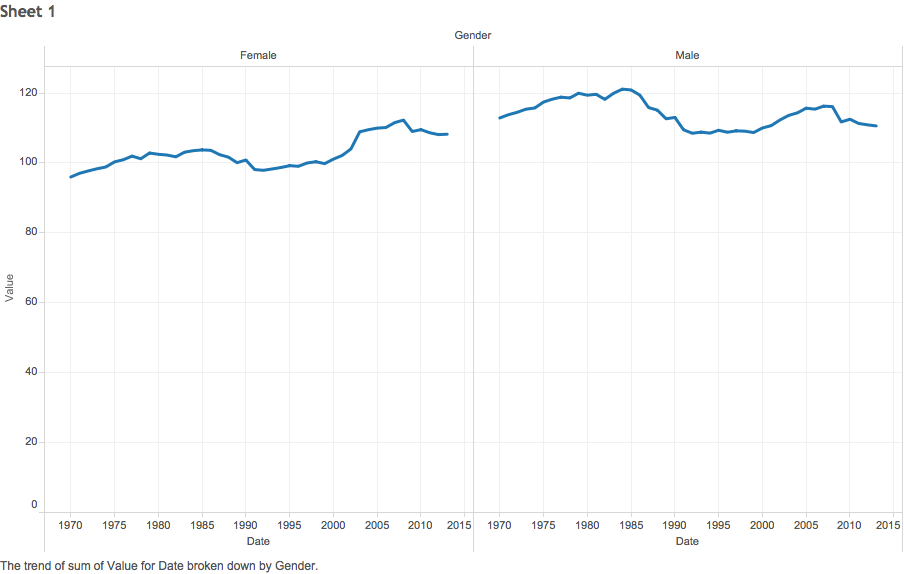

In [2]:
# I then produce the graph I created in Tableau.
from IPython.display import Image
Image(filename='world.png')

In [7]:
# I then look at East Asia & Pacific. 
eastasia = result[result['country_cleaned'] == 'East Asia & Pacific']
eastasia.to_csv("eastasia.csv")
# This file is unfortunately empty.

In [8]:
# I now want to look at Europe & Central Asia
europeca = result[result['country_cleaned'] == 'Europe & Central Asia']
europeca.to_csv("europeca.csv")
# Again, this file is empty.

In [9]:
# I check for Latin America & Caribbean.
latamc = result[result['country_cleaned'] == 'Latin America & Caribbean']
latamc.to_csv("latamc.csv")
# Again, the file is empty.

In [10]:
# I look at Middle East & North Africa.
mdena = result[result['country_cleaned'] == 'Middle East & North Africa']
mdena.to_csv("mdena.csv")
# Empty.

In [11]:
# South Asia
sasia = result[result['country_cleaned'] == 'South Asia']
sasia.to_csv("sasia.csv")

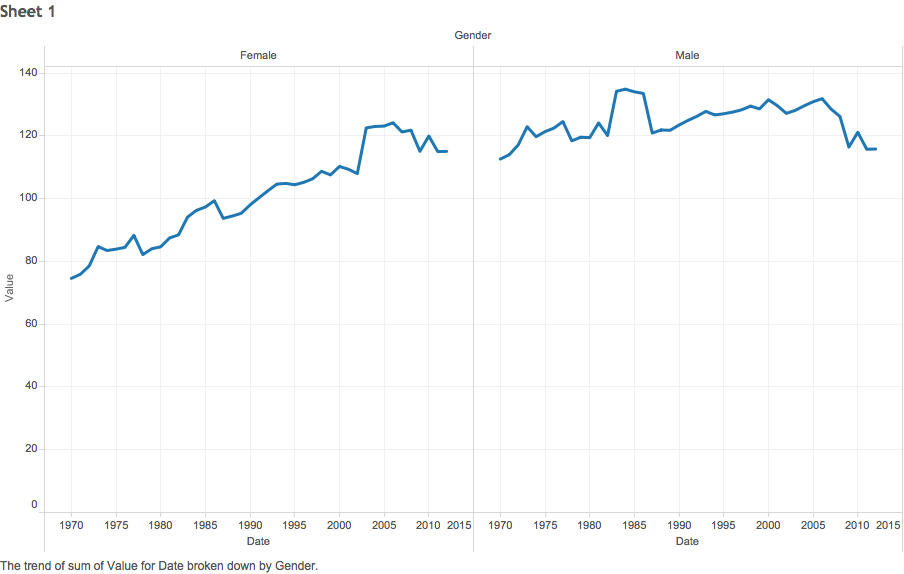

In [12]:
Image(filename='sasia.png')

In [13]:
# Finally, I look at Sub Saharan Africa
ssafrica = result[result['country_cleaned'] == 'Sub Saharan Africa']
ssafrica.to_csv("ssafrica.csv")
# Again, another empty file.

In [6]:
# I now look at the Arab world.
arabworld = result[result['country_cleaned'] == 'Arab World']
arabworld.to_csv("arabworld.csv")

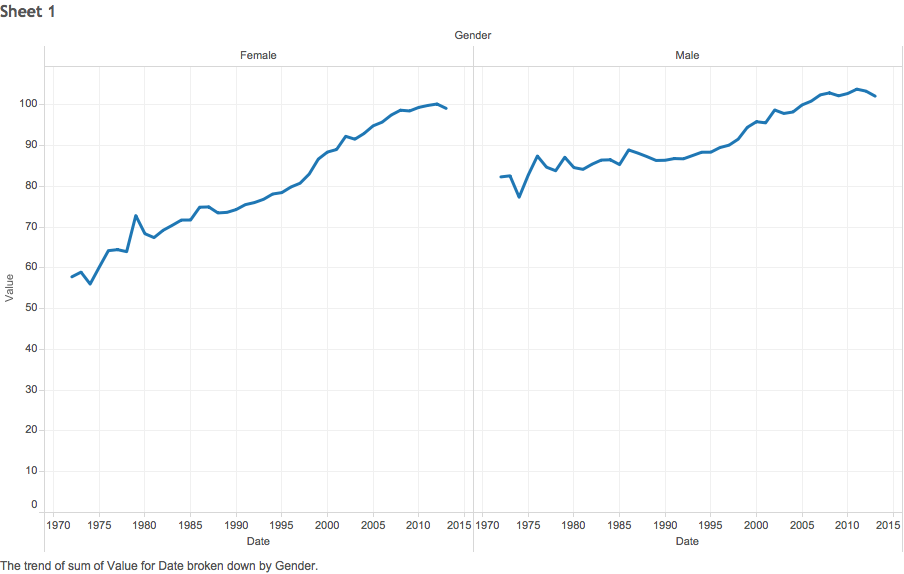

In [9]:
Image(filename='arabworld.png')

In [10]:
# Caribbean small states.
carss = result[result['country_cleaned'] == 'Caribbean small states']
carss.to_csv("carss.csv")

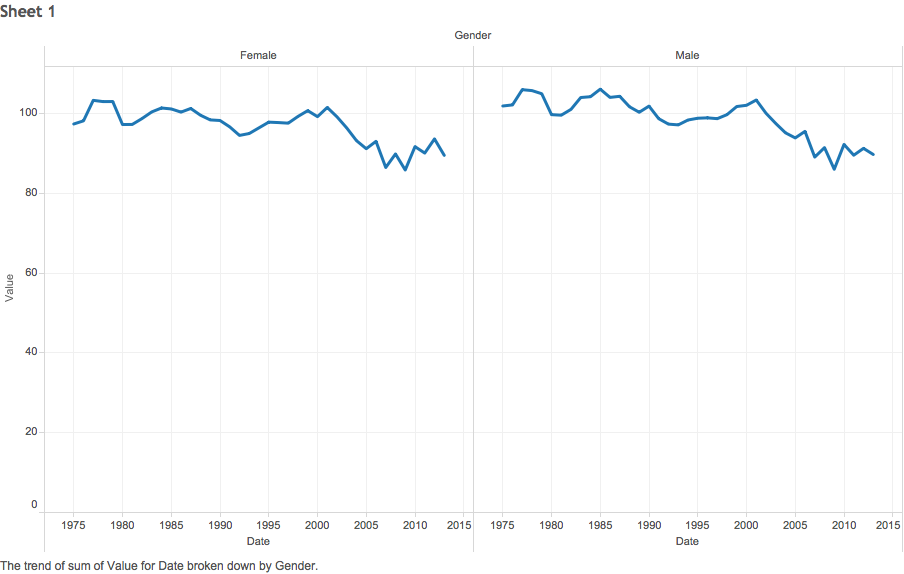

In [11]:
Image(filename='carss.png')

In [12]:
# Central Europe and the Baltics
ceatb = result[result['country_cleaned'] == 'Central Europe and the Baltics']
ceatb.to_csv("ceatb.csv")

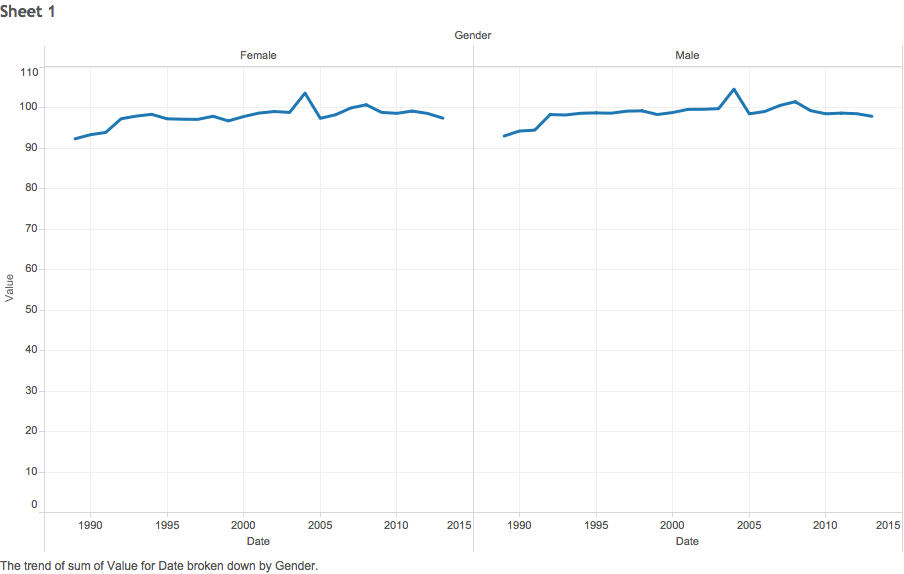

In [13]:
Image(filename='ceatb.png')

In [14]:
# Euro area
euroa = result[result['country_cleaned'] == 'Euro area']
euroa.to_csv("euroa.csv")

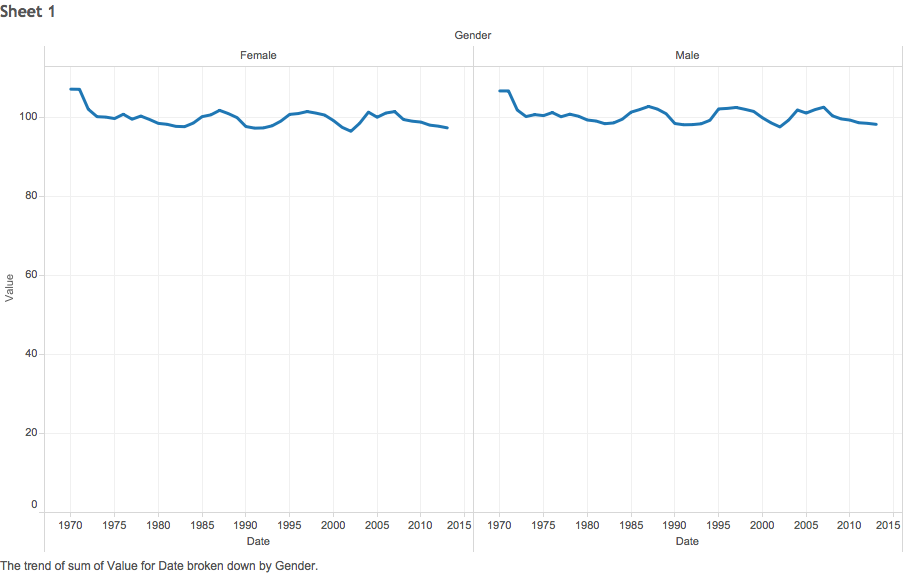

In [15]:
Image(filename='euroa.png')

In [16]:
# European Union
eu = result[result['country_cleaned'] == 'European Union']
eu.to_csv("eu.csv")

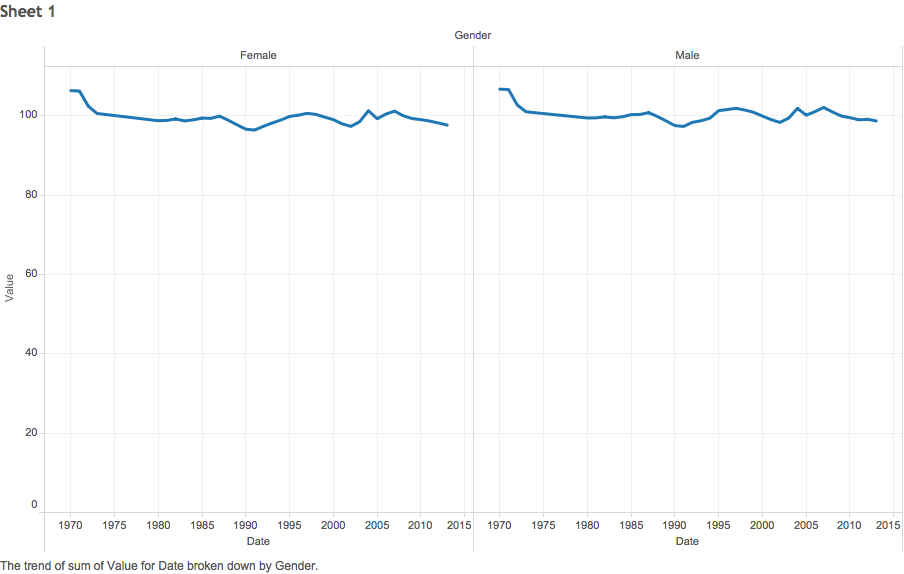

In [17]:
Image(filename='eu.png')

In [18]:
# Fragile and conflict affected situations
frcas = result[result['country_cleaned'] == 'Fragile and conflict affected situations']
frcas.to_csv("frcas.csv")

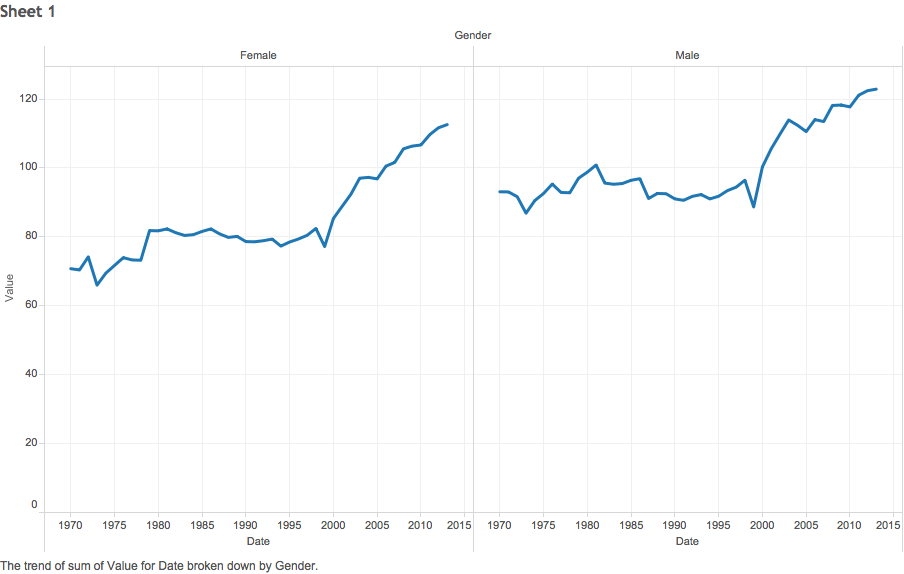

In [19]:
Image(filename='frcas.png')

In [20]:
# Pacific island small states
paiss = result[result['country_cleaned'] == 'Pacific island small states']
paiss.to_csv("paiss.csv")

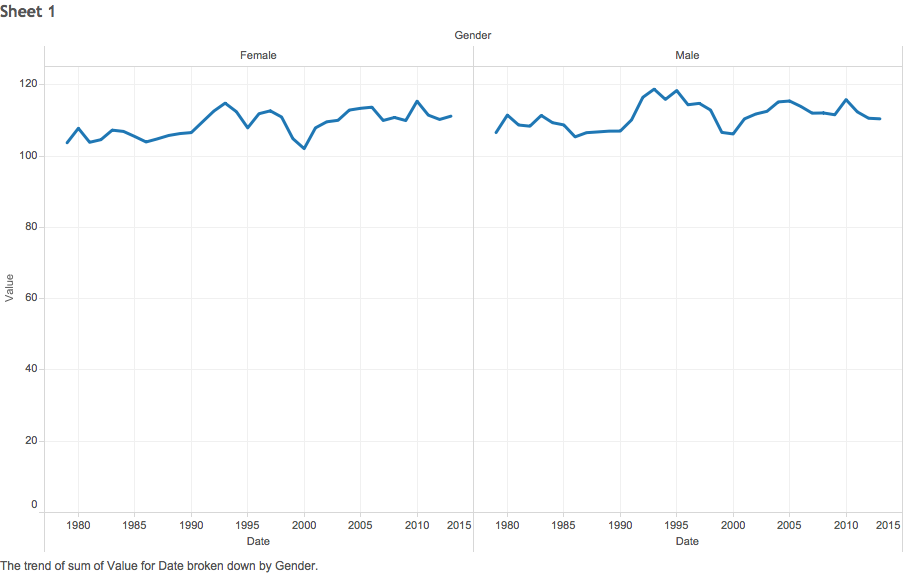

In [21]:
Image(filename='paiss.png')

In [ ]:
'''The second thing I wanted to look is the number of repeaters but there is insufficient coverage for that.
I look at out of school children instead.'''

In [4]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.FE?per_page=13000&date=1960:2016&format=json")
data = response.json()
df5 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df5['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['country'])))
df5['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df5 = df5.dropna()
df5['Gender'] = 'Female'

In [5]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.MA?per_page=13000&date=1960:2016&format=json")
data = response.json()
df6 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df6['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['country'])))
df6['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df6 = df6.dropna()
df6['Gender'] = 'Male'

In [6]:
# I now concatenate these two tables.
'''I can now concatenate the two dataframes.'''
frames3 = [df5, df6]
result3 = pd.concat(frames3)

In [31]:
# I start by looking at the statistics for the world.
world3 = result3[result3['country_cleaned'] == 'World']
world3.to_csv("world3.csv")

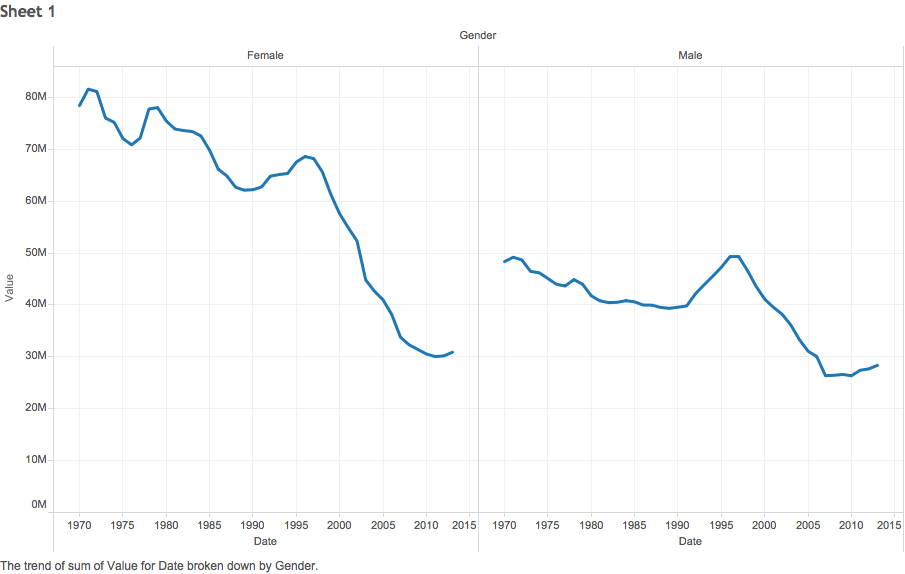

In [32]:
Image(filename='world3.png')

In [33]:
# I then look at East Asia & Pacific. 
eastasia3 = result3[result3['country_cleaned'] == 'East Asia & Pacific']
eastasia3.to_csv("eastasia3.csv")
# Insufficient data.

In [34]:
# I now want to look at Europe & Central Asia
europeca3 = result3[result3['country_cleaned'] == 'Europe & Central Asia']
europeca3.to_csv("europeca3.csv")
# Again, no data.

In [35]:
# I check for Latin America & Caribbean.
latamc3 = result3[result3['country_cleaned'] == 'Latin America & Caribbean']
latamc3.to_csv("latamc3.csv")

In [38]:
# I look at Middle East & North Africa.
mdena3 = result3[result3['country_cleaned'] == 'Middle East & North Africa']
mdena3['country_cleaned'].value_counts()
# empty

Series([], Name: country_cleaned, dtype: int64)

In [43]:
# South Asia
sasia3 = result3[result3['country_cleaned'] == 'South Asia']
sasia3.to_csv("sasia3.csv")

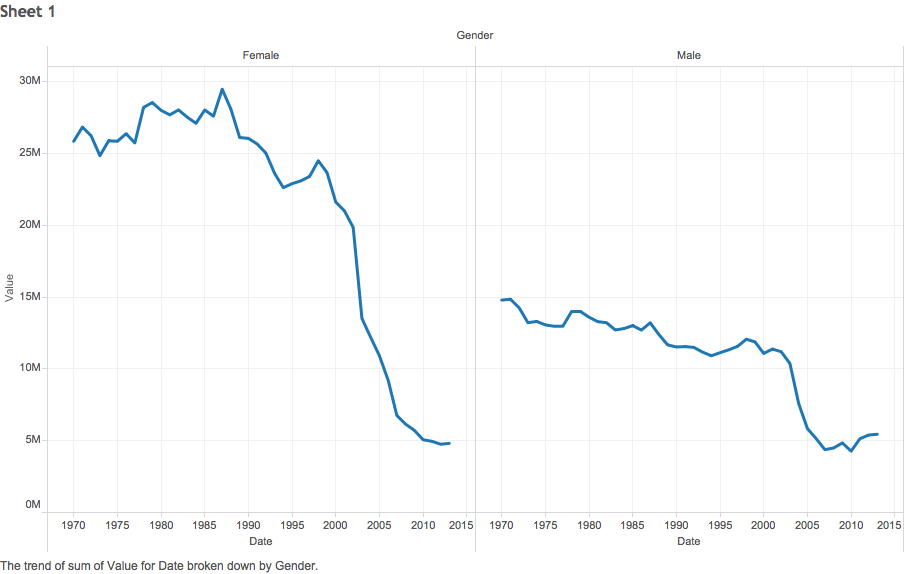

In [44]:
Image(filename='sasia3.png')

In [46]:
# I look at Sub Saharan Africa
ssafrica3 = result3[result3['country_cleaned'] == 'Sub Saharan Africa']
ssafrica3['country_cleaned'].value_counts()
# another empty DataFrame

Series([], Name: country_cleaned, dtype: int64)

In [47]:
# I now look at the Arab world.
arabworld3 = result3[result3['country_cleaned'] == 'Arab World']
arabworld3.to_csv("arabworld3.csv")

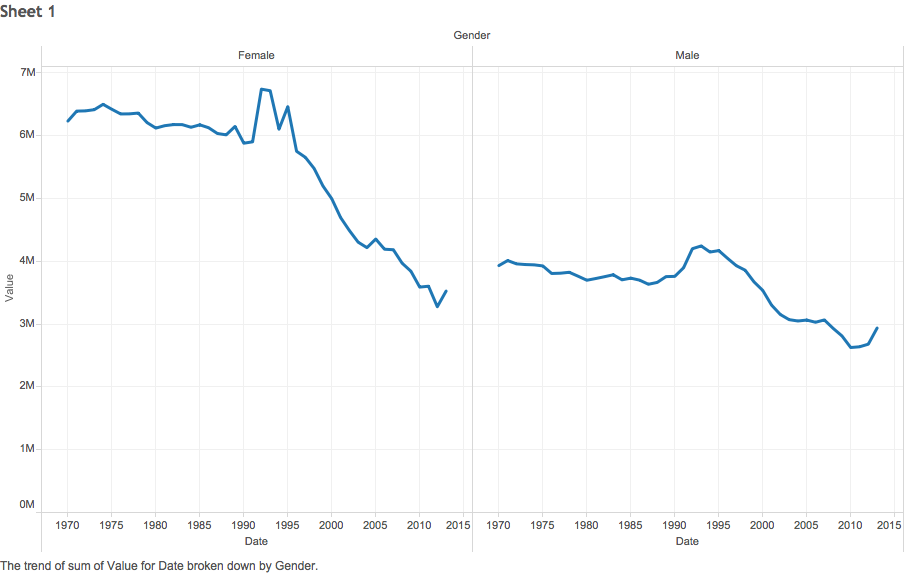

In [48]:
Image(filename='arabworld3.png')

In [49]:
# Caribbean small states.
carss3 = result3[result3['country_cleaned'] == 'Caribbean small states']
carss3.to_csv("carss3.csv")

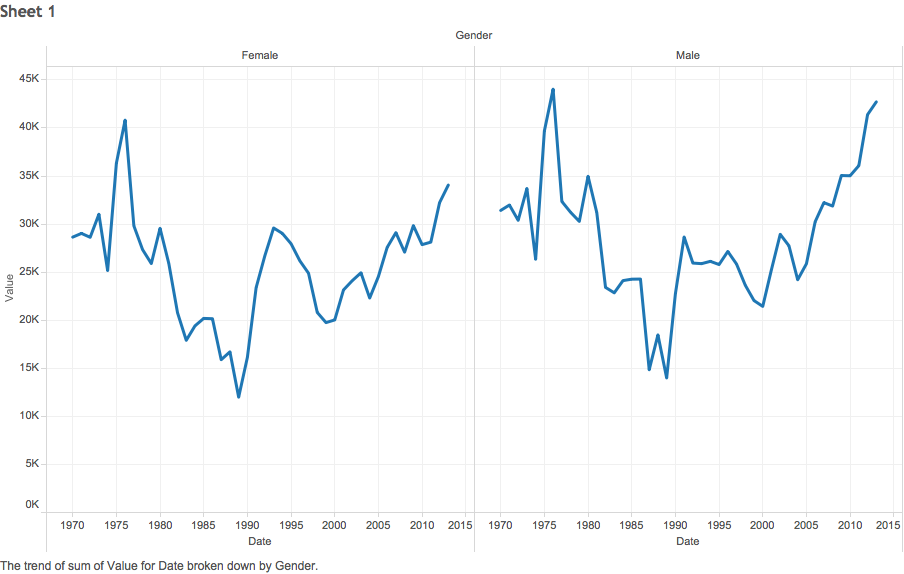

In [50]:
Image(filename='carss3.png')

In [7]:
# Central Europe and the Baltics
ceatb3 = result3[result3['country_cleaned'] == 'Central Europe and the Baltics']
ceatb3.to_csv("ceatb3.csv")

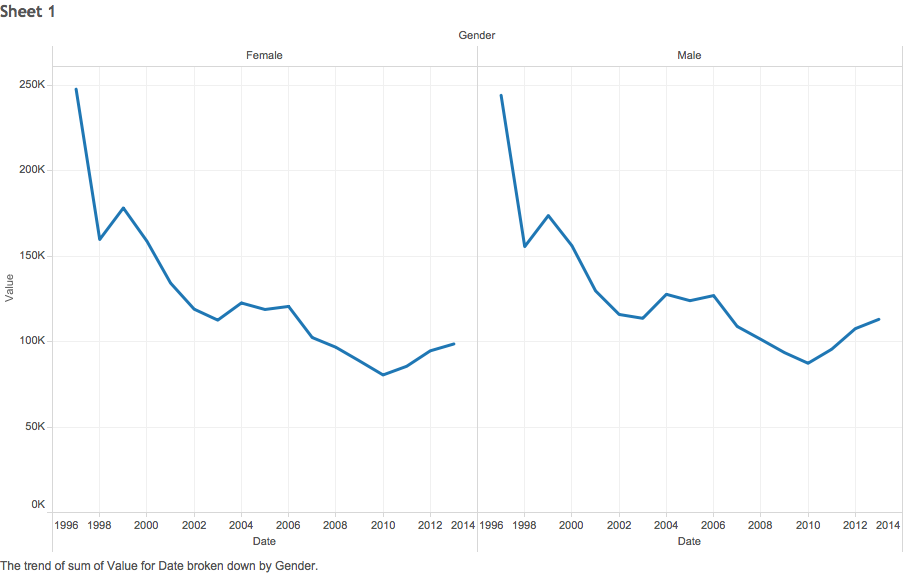

In [8]:
Image(filename='ceatb3.png')

In [9]:
# Euro area
euroa3 = result3[result3['country_cleaned'] == 'Euro area']
euroa3.to_csv("euroa3.csv")

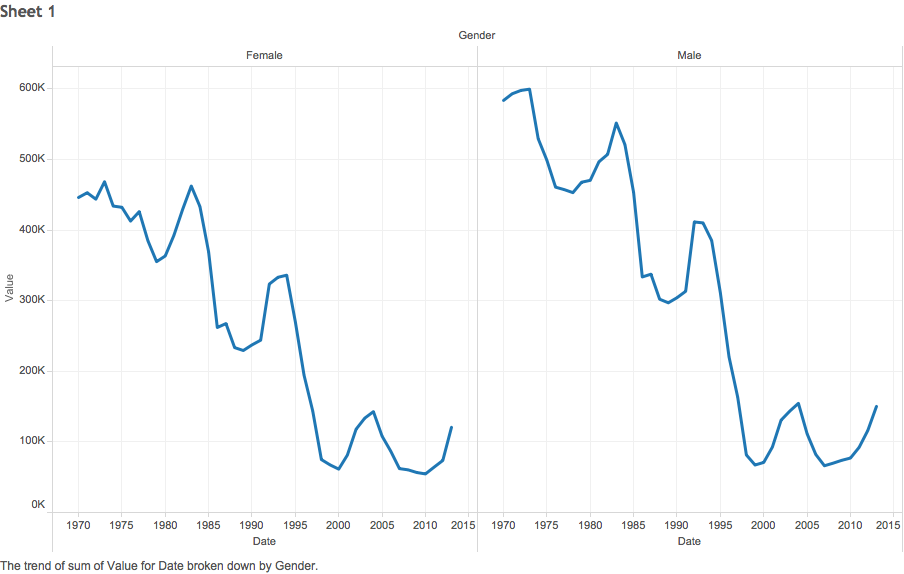

In [10]:
Image(filename='euroa3.png')

In [11]:
# European Union
eu3 = result3[result3['country_cleaned'] == 'European Union']
eu3.to_csv("eu3.csv")

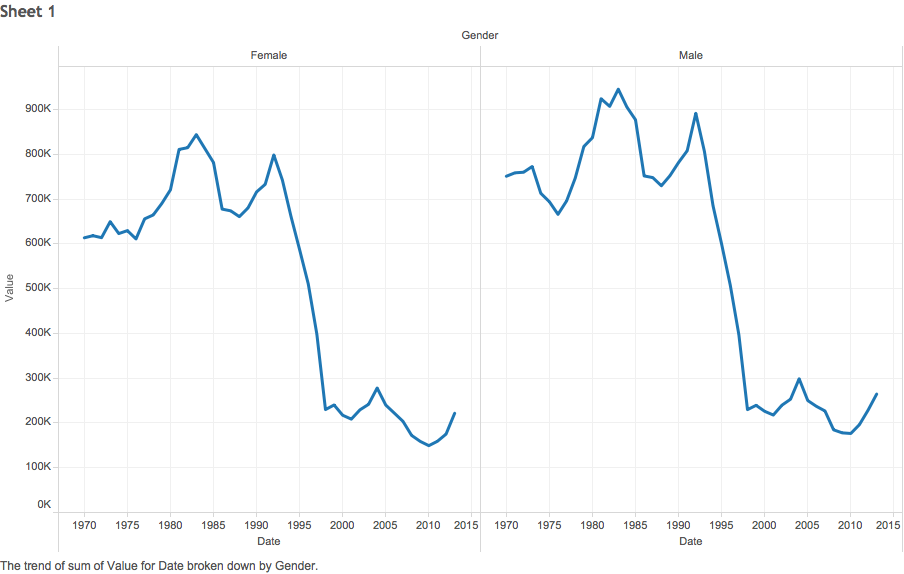

In [12]:
Image(filename='eu3.png')

In [13]:
# Fragile and conflict affected situations
frcas3 = result3[result3['country_cleaned'] == 'Fragile and conflict affected situations']
frcas3.to_csv("frcas3.csv")

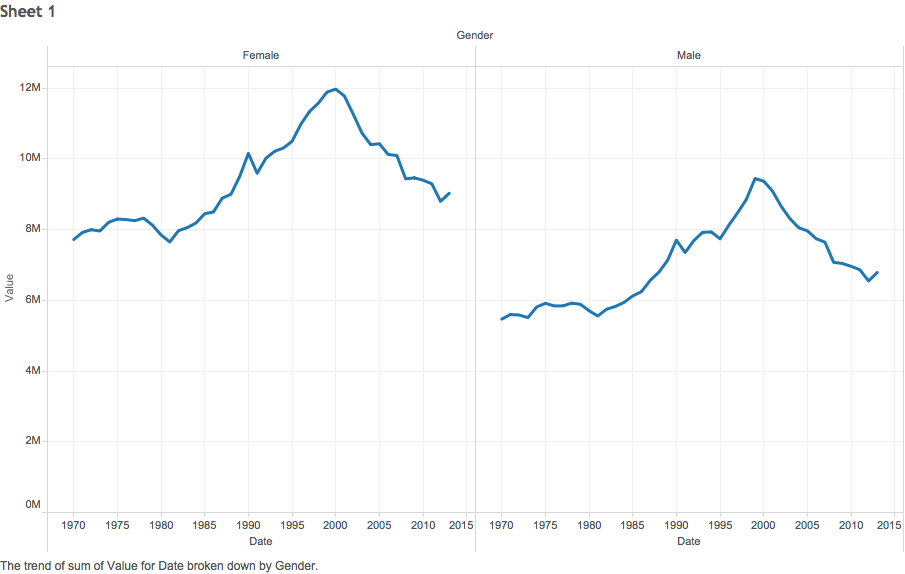

In [14]:
Image(filename='frcas3.png')

In [15]:
# Pacific island small states
paiss3 = result3[result3['country_cleaned'] == 'Pacific island small states']
paiss3.to_csv("paiss3.csv")

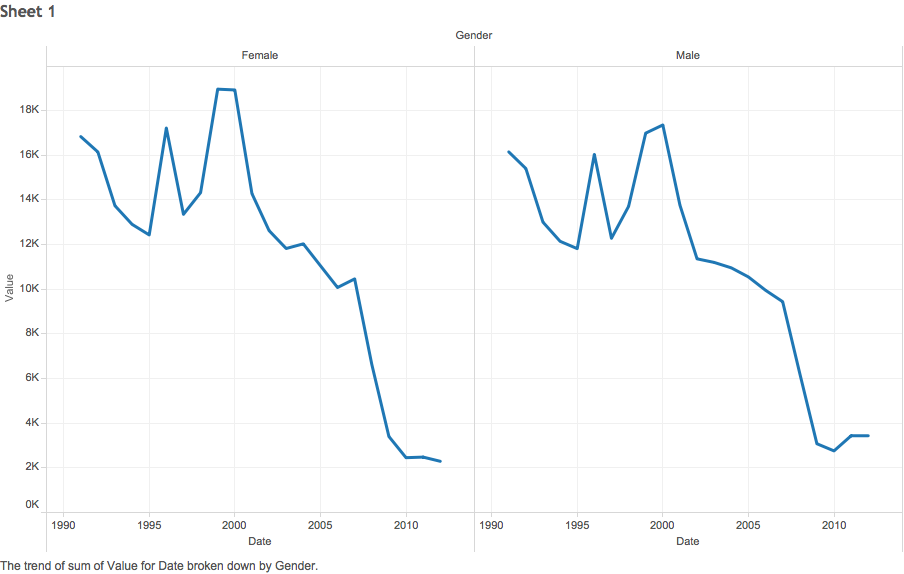

In [16]:
Image(filename='paiss3.png')

In [ ]:
'''The next thing I want to look at is out of school children - female and male.'''

In [17]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.FE?per_page=13000&date=1960:2016&format=json")
data = response.json()
df5 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df5['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['country'])))
df5['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df5 = df5.dropna()
df5['Gender'] = 'Female'

In [18]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.MA?per_page=13000&date=1960:2016&format=json")
data = response.json()
df6 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df6['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['country'])))
df6['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df6 = df6.dropna()
df6['Gender'] = 'Male'

In [20]:
# I now concatenate these two tables.
frames4 = [df5, df6]
result4 = pd.concat(frames4)

In [21]:
world4 = result4[result4['country_cleaned'] == 'World']
world4.to_csv("world4.csv")

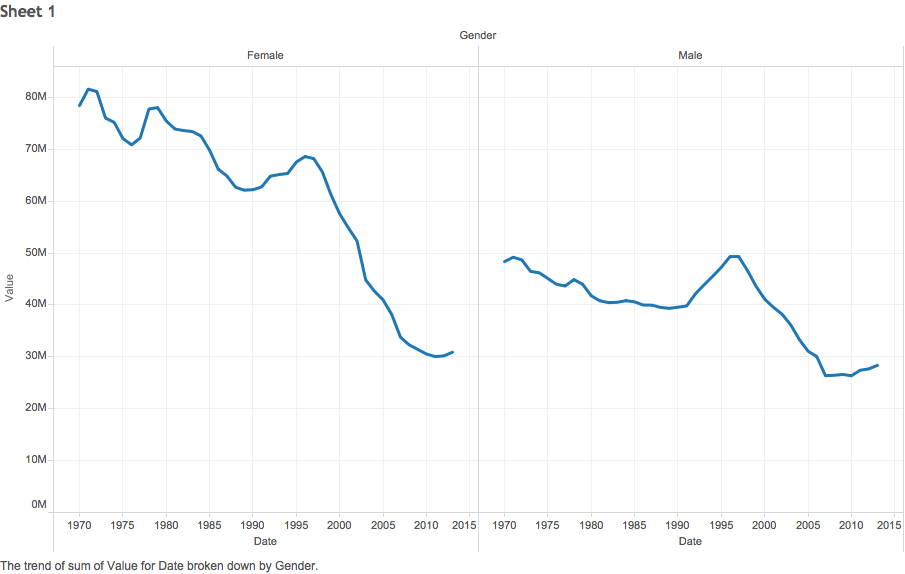

In [22]:
Image(filename='world4.png')

In [23]:
# I then look at East Asia & Pacific. 
eastasia4 = result4[result4['country_cleaned'] == 'East Asia & Pacific']
eustasia4['country_cleaned'].value_counts()
# Again, this is empty.

Series([], Name: country_cleaned, dtype: int64)

In [24]:
# I now want to look at Europe & Central Asia
europeca4 = result4[result4['country_cleaned'] == 'Europe & Central Asia']
europeca4['country_cleaned'].value_counts()
# Another empty one.

Series([], Name: country_cleaned, dtype: int64)

In [25]:
# I check for Latin America & Caribbean.
latamc4 = result4[result4['country_cleaned'] == 'Latin America & Caribbean']
latamc4['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [26]:
# I look at Middle East & North Africa.
mdena4 = result4[result4['country_cleaned'] == 'Middle East & North Africa']
mdena4['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [28]:
# South Asia
sasia4 = result4[result4['country_cleaned'] == 'South Asia']
sasia4.to_csv("sasia4.csv")

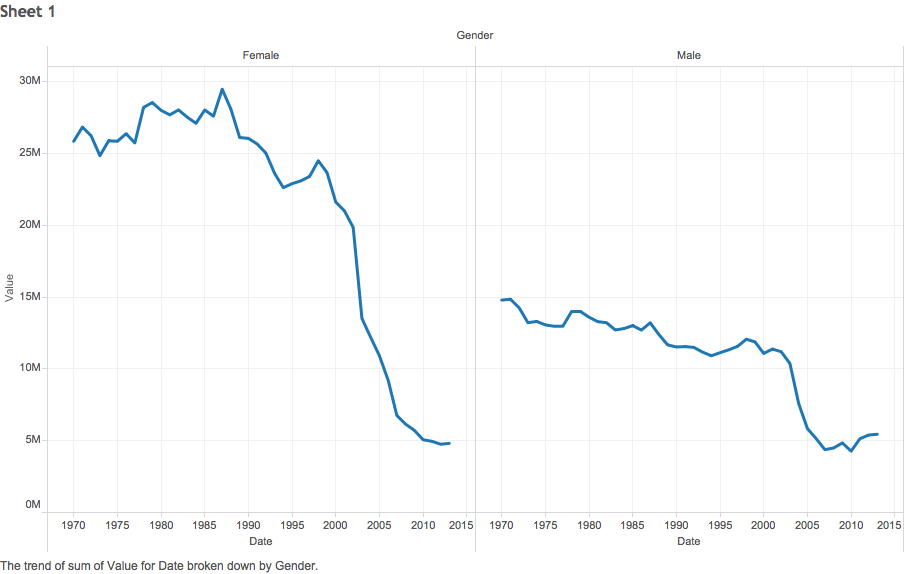

In [29]:
Image(filename='sasia4.png')

In [31]:
# Finally, I look at Sub Saharan Africa
ssafrica4 = result4[result4['country_cleaned'] == 'Sub Saharan Africa']
ssafrica4['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [33]:
# I now look at the Arab world.
arabworld4 = result4[result4['country_cleaned'] == 'Arab World']
arabworld4.to_csv("arabworld4.csv")

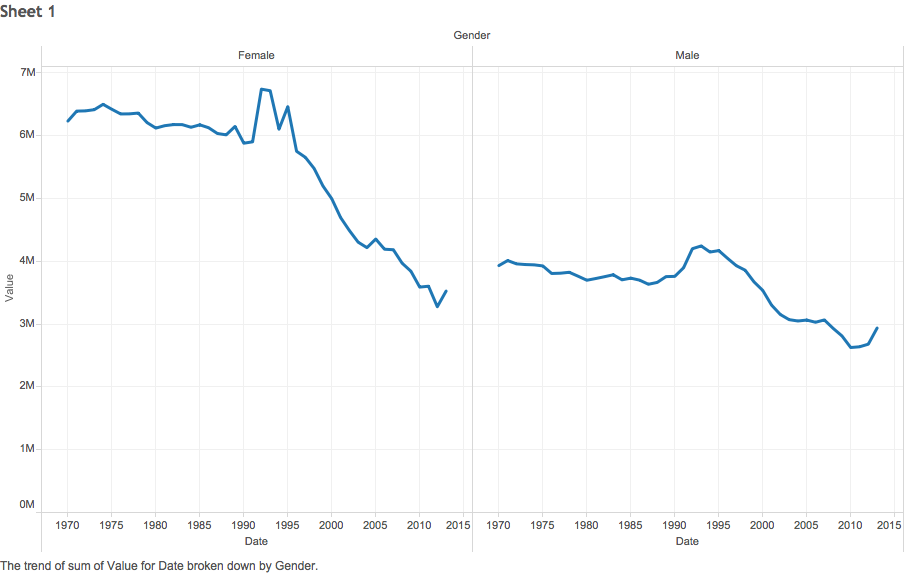

In [34]:
Image(filename='arabworld4.png')

In [36]:
# Caribbean small states.
carss4 = result4[result4['country_cleaned'] == 'Caribbean small states']
carss4.to_csv("carss4.csv")

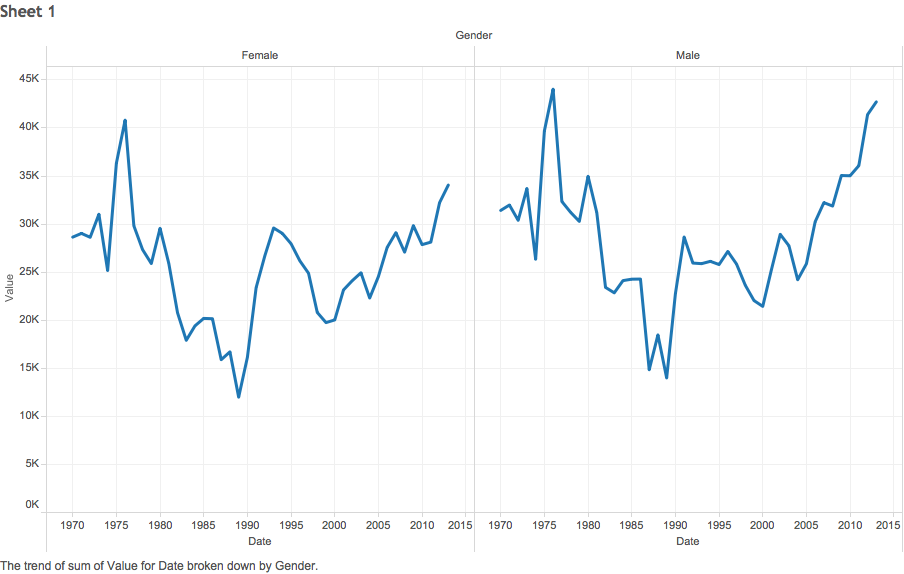

In [37]:
Image(filename='carss4.png')

In [38]:
# Central Europe and the Baltics
ceatb4 = result4[result4['country_cleaned'] == 'Central Europe and the Baltics']
ceatb4.to_csv("ceatb4.csv")

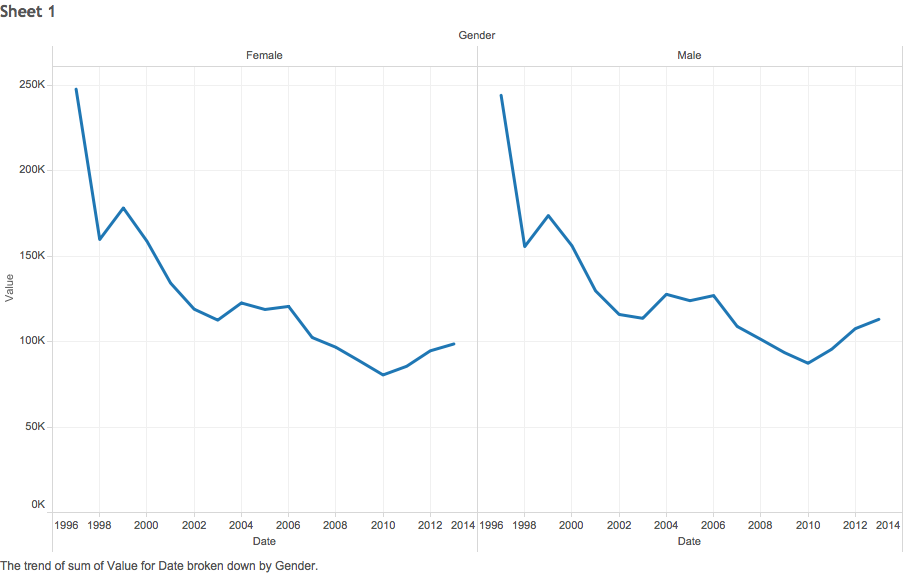

In [39]:
Image(filename='ceatb4.png')

In [40]:
# Euro area
euroa4 = result4[result4['country_cleaned'] == 'Euro area']
euroa4.to_csv("euroa4.csv")

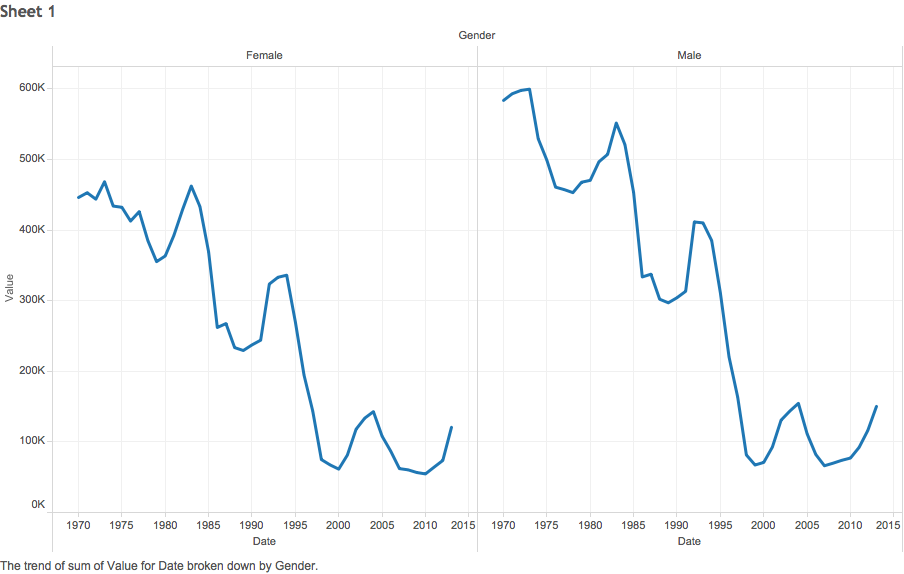

In [41]:
Image(filename='euroa4.png')

In [42]:
# European Union
eu4 = result4[result4['country_cleaned'] == 'European Union']
eu4.to_csv("eu4.csv")

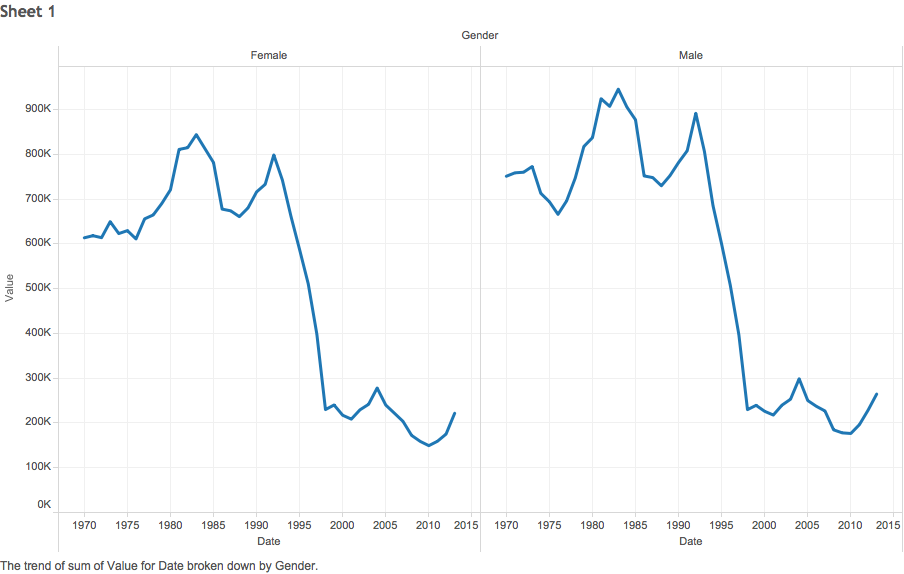

In [43]:
Image(filename='eu4.png')

In [44]:
# Fragile and conflict affected situations
frcas4 = result4[result4['country_cleaned'] == 'Fragile and conflict affected situations']
frcas4.to_csv("frcas4.csv")

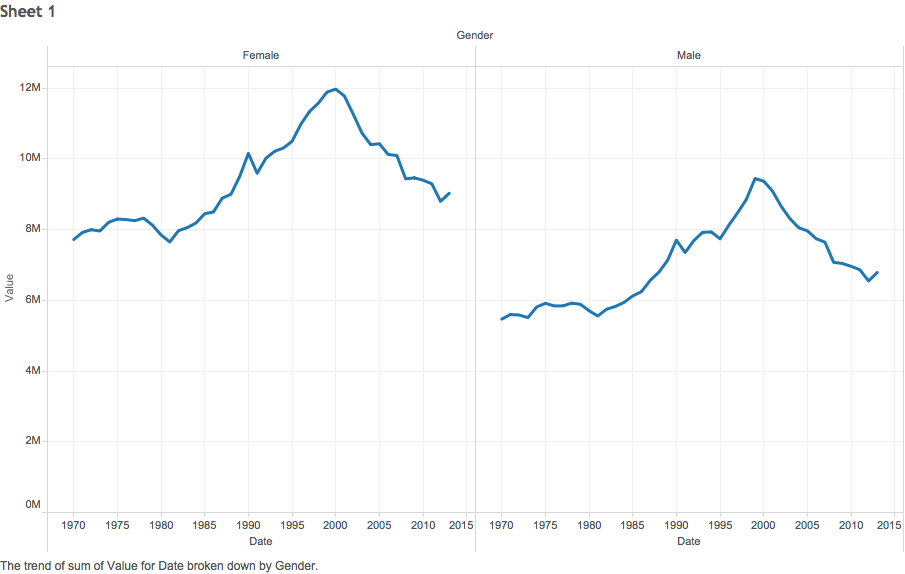

In [45]:
Image(filename='frcas4.png')

In [46]:
# Pacific island small states
paiss4 = result4[result4['country_cleaned'] == 'Pacific island small states']
paiss4.to_csv("paiss4.csv")

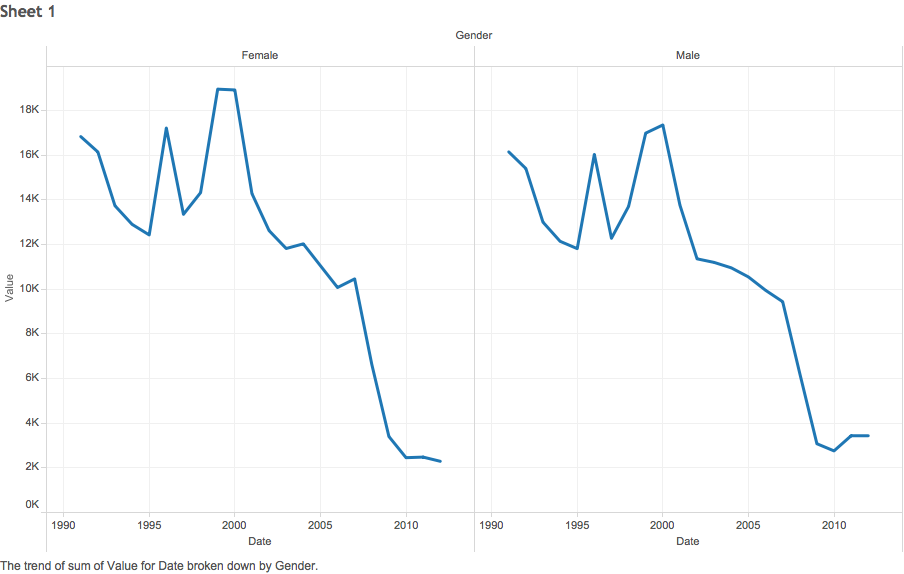

In [47]:
Image(filename='paiss4.png')

In [ ]:
'''The next thing I want to look at is primary completion rate.'''

In [48]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df7 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df7['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['country'])))
df7['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df7 = df7.dropna()
df7['Gender'] = 'Female'

In [49]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df8 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df8['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['country'])))
df8['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df8 = df8.dropna()
df8['Gender'] = 'Male'

In [50]:
# I now finally want to look at the data for both sexes.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df9 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df9['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['country'])))
df9['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df9 = df9.dropna()
df9['Gender'] = 'Both sexes'

In [51]:
'''I can now concatenate the three dataframes.'''
frames5 = [df7, df8, df9]
result5 = pd.concat(frames5)

In [52]:
# Firstly, I look at the data from the world.
world5 = result5[result5['country_cleaned'] == 'World']
world5.to_csv("world5.csv")

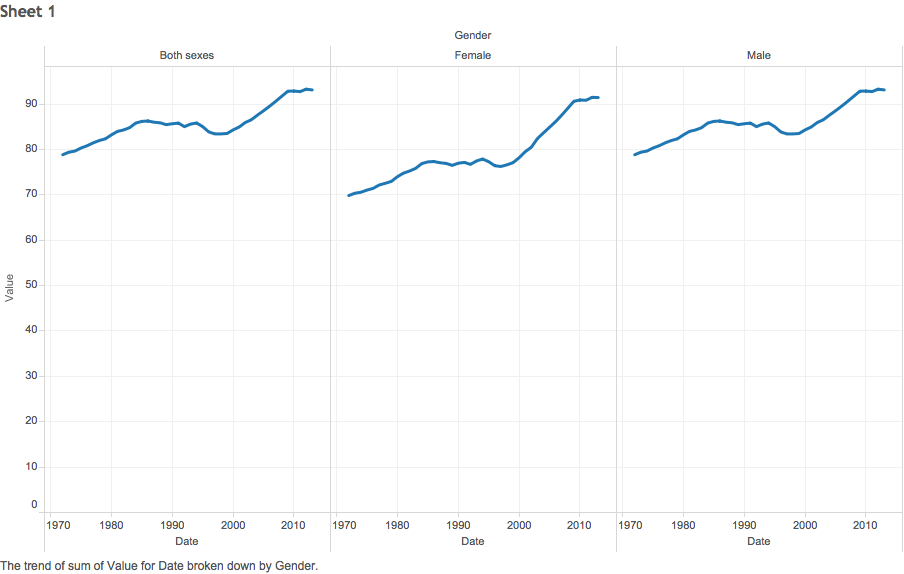

In [53]:
Image(filename='world5.png')

In [55]:
# I then look at East Asia & Pacific. 
eastasia5 = result5[result5['country_cleaned'] == 'East Asia & Pacific']
eastasia5['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [56]:
# I now want to look at Europe & Central Asia
europeca5 = result5[result5['country_cleaned'] == 'Europe & Central Asia']
europeca5['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [57]:
# I check for Latin America & Caribbean.
latamc5 = result5[result5['country_cleaned'] == 'Latin America & Caribbean']
latamc5['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [58]:
# I look at Middle East & North Africa.
mdena5 = result5[result5['country_cleaned'] == 'Middle East & North Africa']
mdena5['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [60]:
# South Asia
sasia5 = result5[result5['country_cleaned'] == 'South Asia']
sasia5.to_csv("sasia5.csv")

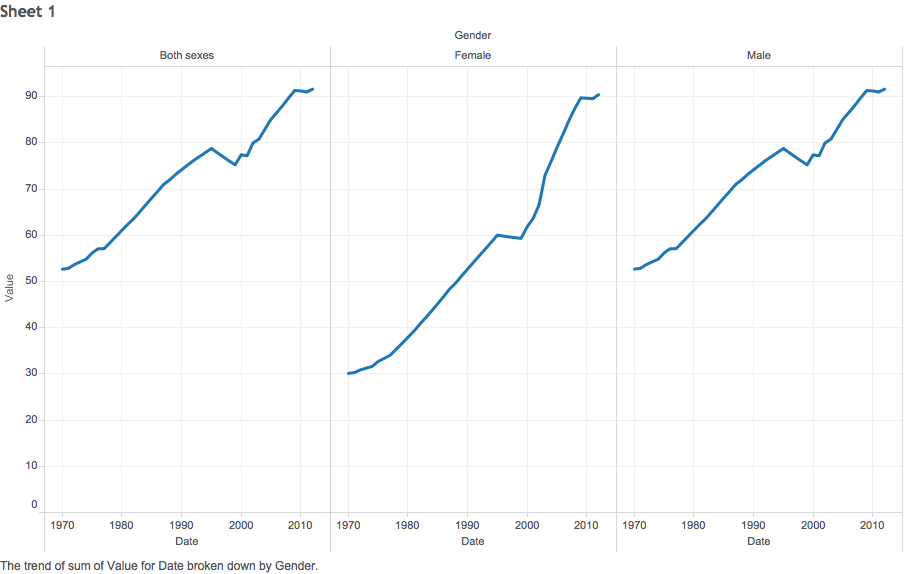

In [61]:
Image(filename='sasia5.png')

In [62]:
# I look at Sub Saharan Africa
ssafrica5 = result5[result5['country_cleaned'] == 'Sub Saharan Africa']
ssafrica5['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [64]:
# I now look at the Arab world.
arabworld5 = result5[result5['country_cleaned'] == 'Arab World']
arabworld5.to_csv("arabworld5.csv")

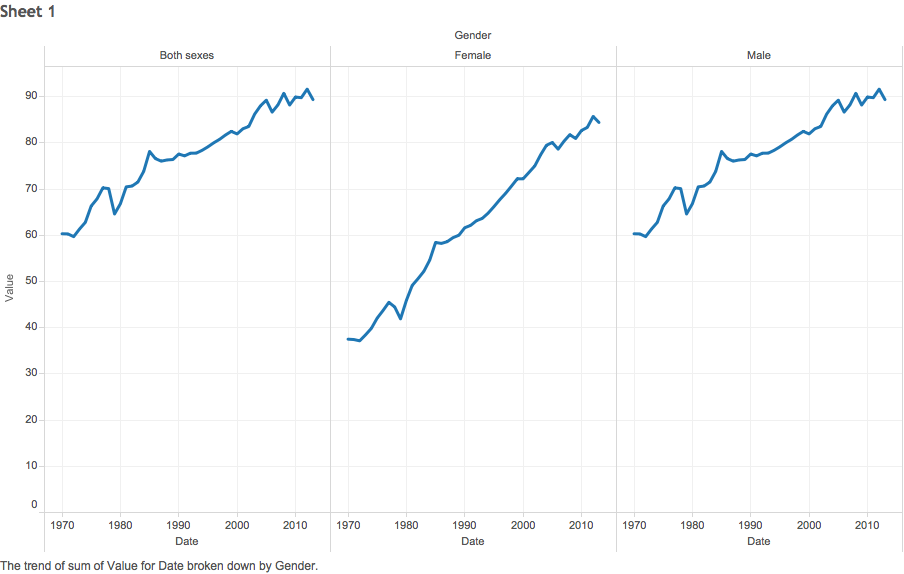

In [65]:
Image(filename='arabworld5.png')

In [67]:
# Caribbean small states.
carss5 = result5[result5['country_cleaned'] == 'Caribbean small states']
carss5.to_csv("carss5.csv")

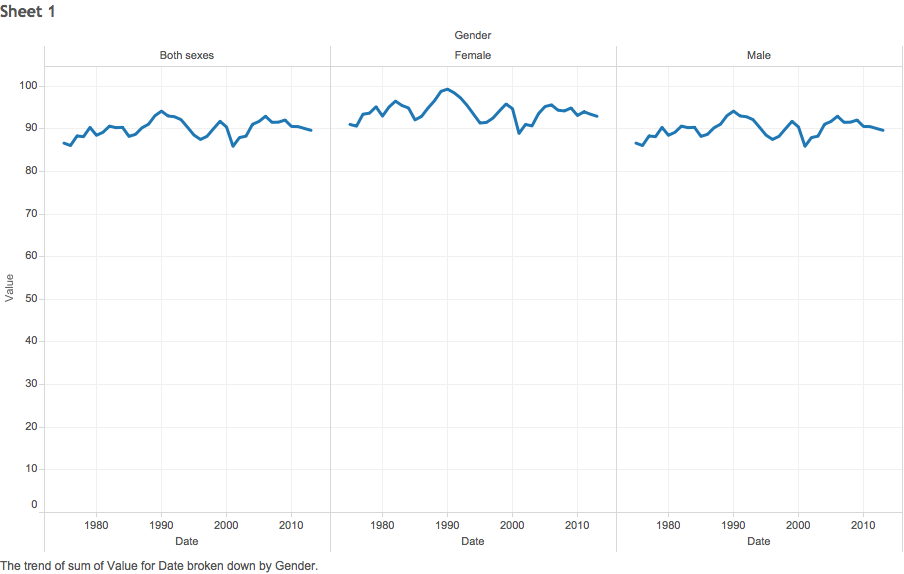

In [68]:
Image(filename='carss5.png')

In [69]:
# Central Europe and the Baltics
ceatb5 = result5[result5['country_cleaned'] == 'Central Europe and the Baltics']
ceatb5.to_csv("ceatb5.csv")

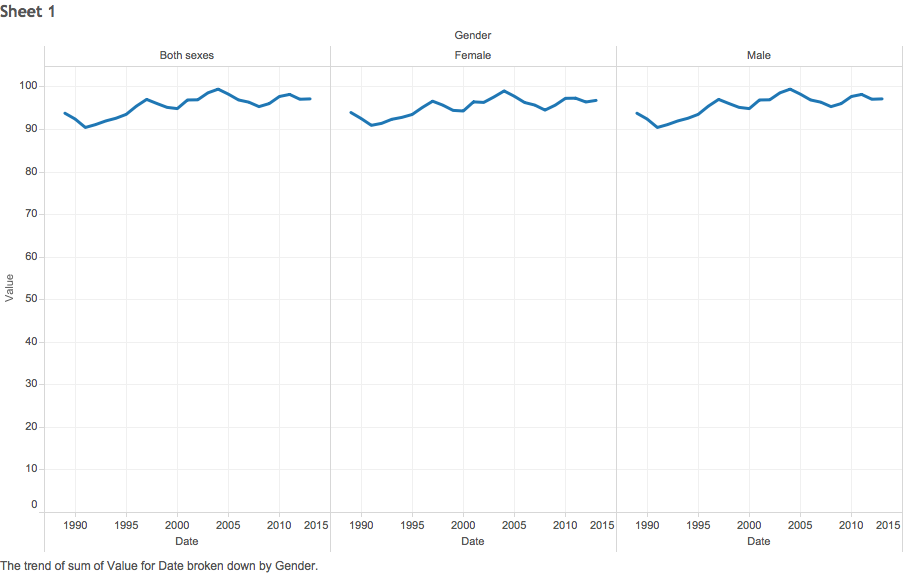

In [70]:
Image(filename='ceatb5.png')

In [71]:
# Euro area
euroa5 = result5[result5['country_cleaned'] == 'Euro area']
euroa5.to_csv("euroa5.csv")

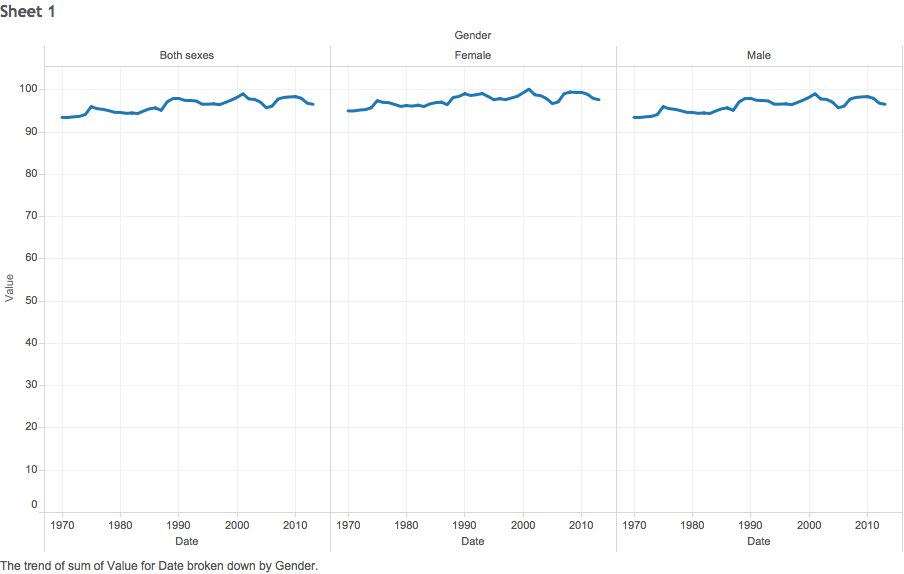

In [72]:
Image(filename='euroa5.png')

In [73]:
# European Union
eu5 = result5[result5['country_cleaned'] == 'European Union']
eu5.to_csv("eu5.csv")

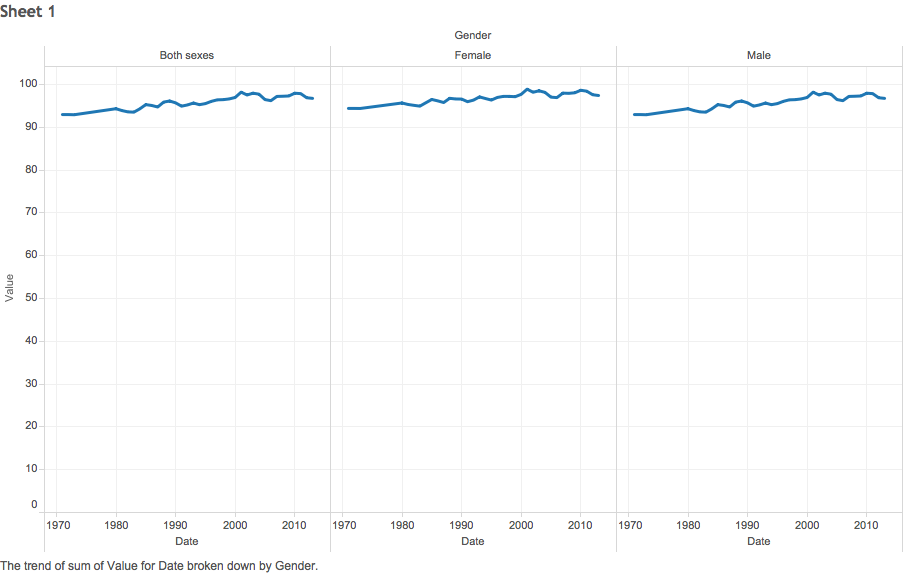

In [74]:
Image(filename='eu5.png')

In [75]:
# Fragile and conflict affected situations
frcas5 = result5[result5['country_cleaned'] == 'Fragile and conflict affected situations']
frcas5.to_csv("frcas5.csv")

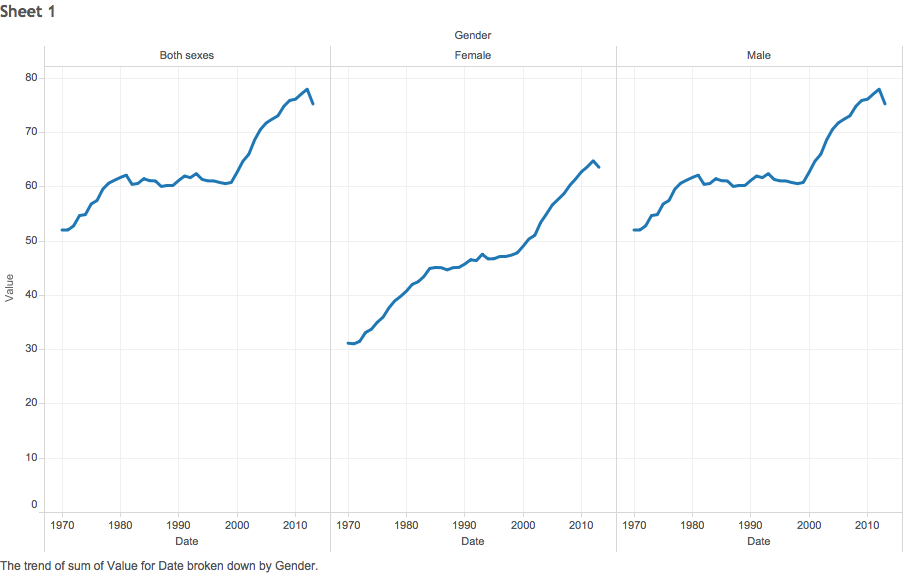

In [76]:
Image(filename='frcas5.png')

In [77]:
# Pacific island small states
paiss5 = result5[result5['country_cleaned'] == 'Pacific island small states']
paiss5.to_csv("paiss5.csv")

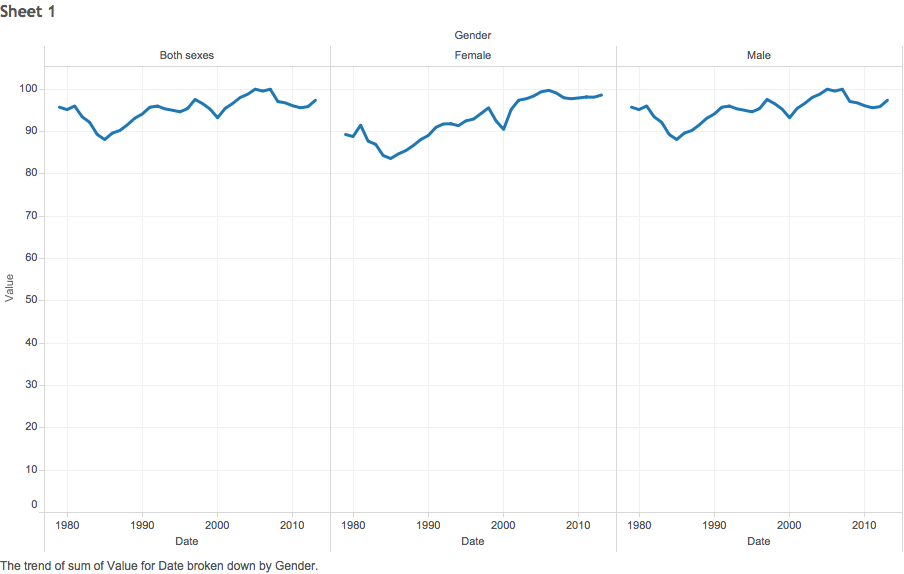

In [78]:
Image(filename='paiss5.png')

In [ ]:
'''Survival rate to the last grade of primary school.'''

In [79]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.PRSL.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df10 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df10['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['country'])))
df10['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df10 = df10.dropna()
df10['Gender'] = 'Female'

In [80]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.PRSL.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df11 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df11['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['country'])))
df11['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df11 = df11.dropna()
df11['Gender'] = 'Male'

In [81]:
'''I can now concatenate the two dataframes.'''
frames6 = [df10, df11]
result6 = pd.concat(frames6)

In [82]:
# Firstly, I look at the data from the world.
world6 = result6[result6['country_cleaned'] == 'World']
world6.to_csv("world6.csv")

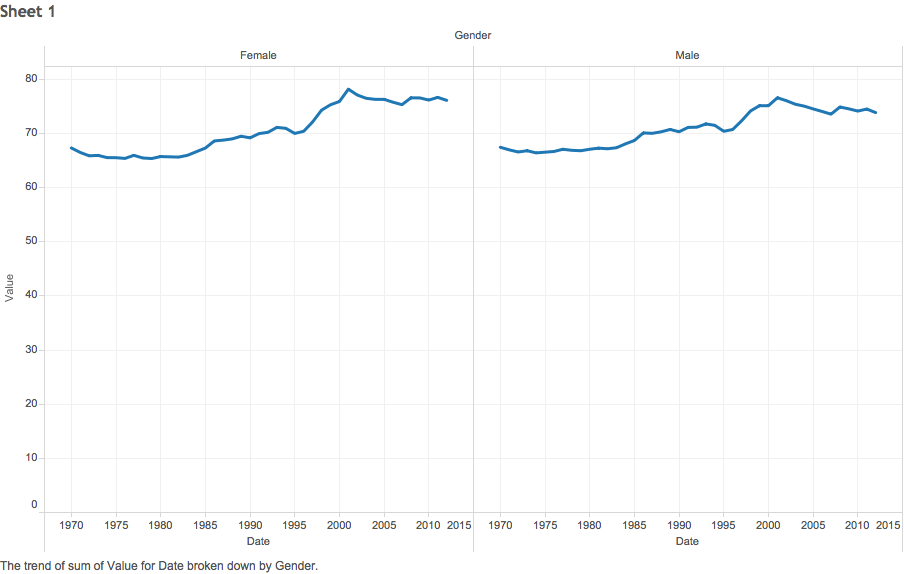

In [83]:
Image(filename='world6.png')

In [84]:
# I then look at East Asia & Pacific. 
eastasia6 = result6[result6['country_cleaned'] == 'East Asia & Pacific']
eastasia6['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [85]:
# I now want to look at Europe & Central Asia
europeca6 = result6[result6['country_cleaned'] == 'Europe & Central Asia']
europeca6['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [86]:
# I check for Latin America & Caribbean.
latamc6 = result6[result6['country_cleaned'] == 'Latin America & Caribbean']
latamc6['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [87]:
# I look at Middle East & North Africa.
mdena6 = result6[result6['country_cleaned'] == 'Middle East & North Africa']
mdena6['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [89]:
# South Asia
sasia6 = result6[result6['country_cleaned'] == 'South Asia']
sasia6.to_csv("sasia6.csv")

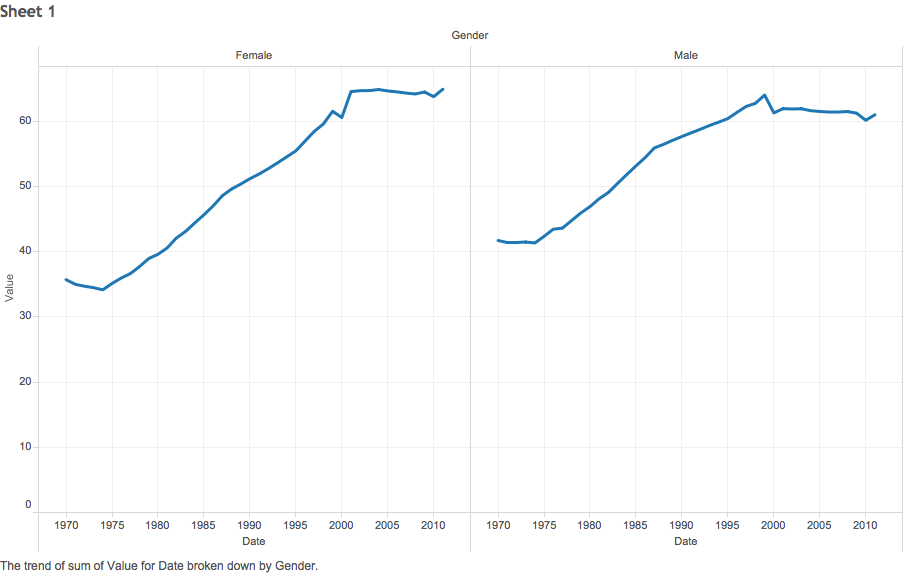

In [90]:
Image(filename='sasia6.png')

In [91]:
# I look at Sub Saharan Africa
ssafrica6 = result6[result6['country_cleaned'] == 'Sub Saharan Africa']
ssafrica6['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [92]:
# I now look at the Arab world.
arabworld6 = result6[result6['country_cleaned'] == 'Arab World']
arabworld6.to_csv("arabworld6.csv")

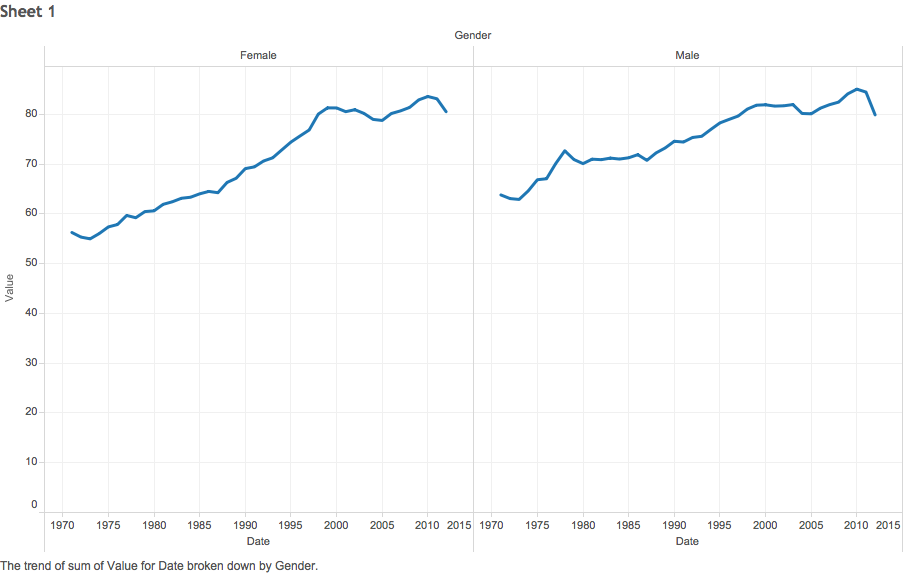

In [93]:
Image(filename='arabworld6.png')

In [94]:
# Caribbean small states.
carss6 = result6[result6['country_cleaned'] == 'Caribbean small states']
carss6.to_csv("carss6.csv")

In [96]:
# Central Europe and the Baltics
ceatb6 = result6[result6['country_cleaned'] == 'Central Europe and the Baltics']
ceatb6.to_csv("ceatb6.csv")

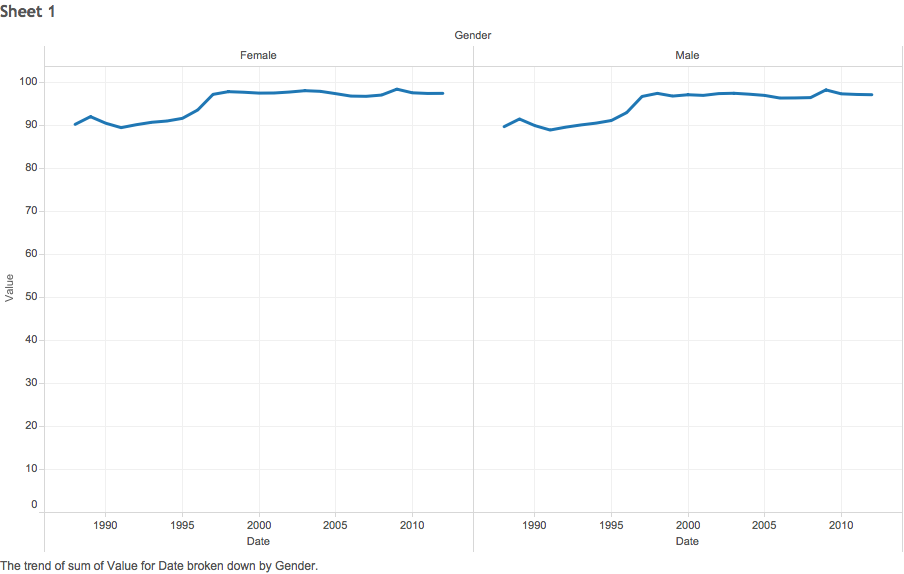

In [97]:
Image(filename='ceatb6.png')

In [98]:
# Euro area
euroa6 = result6[result6['country_cleaned'] == 'Euro area']
euroa6.to_csv("euroa6.csv")

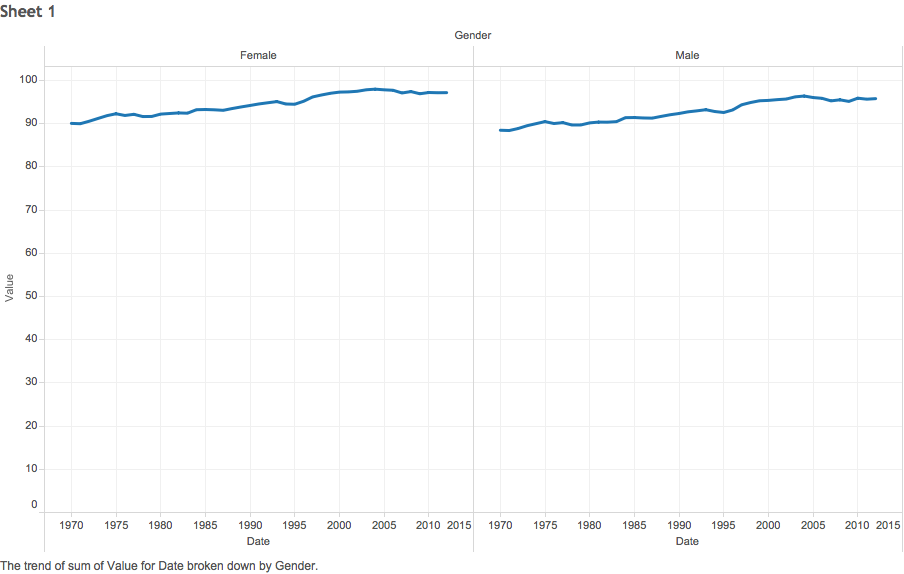

In [99]:
Image(filename='euroa6.png')

In [100]:
# European Union
eu6 = result6[result6['country_cleaned'] == 'European Union']
eu6.to_csv("eu6.csv")

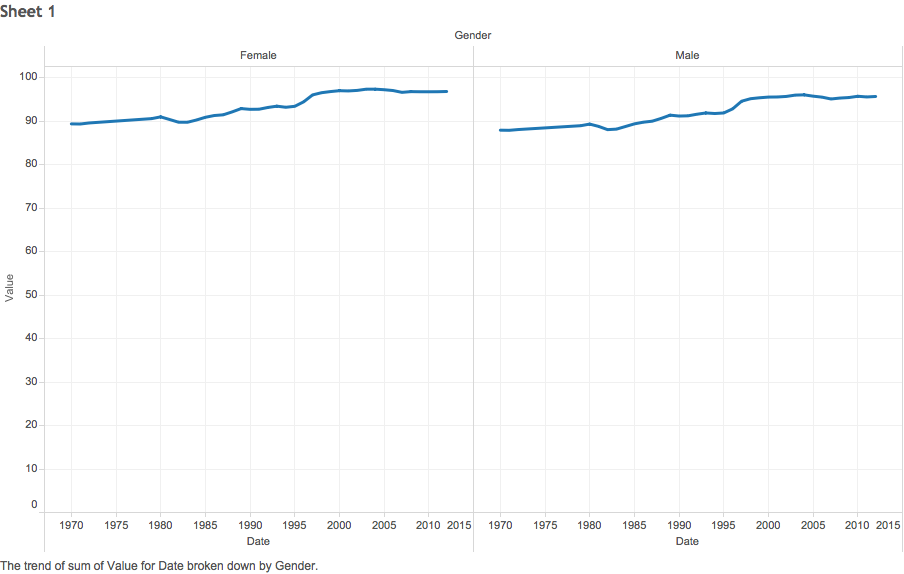

In [101]:
Image(filename='eu6.png')

In [102]:
# Fragile and conflict affected situations
frcas6 = result6[result6['country_cleaned'] == 'Fragile and conflict affected situations']
frcas6.to_csv("frcas6.csv")

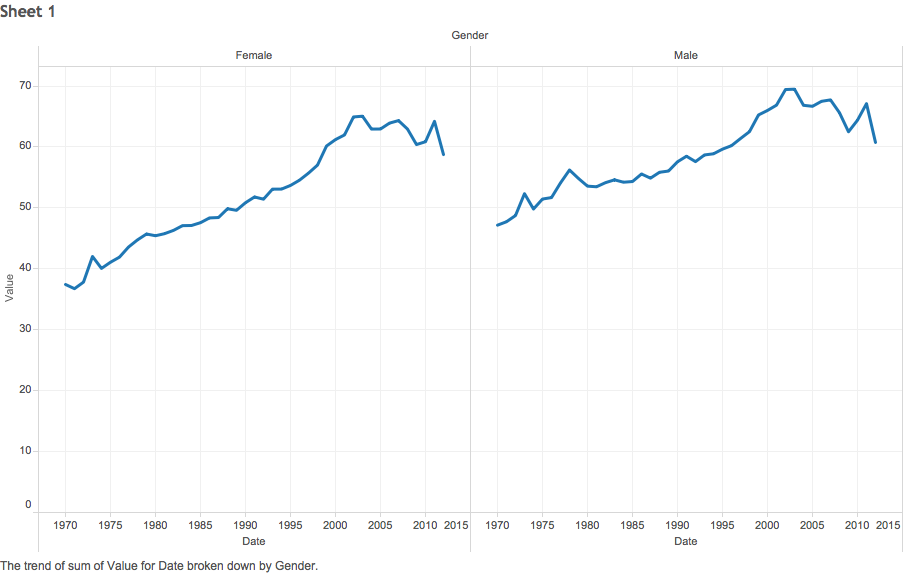

In [103]:
Image(filename='frcas6.png')

In [104]:
# Pacific island small states
paiss6 = result6[result6['country_cleaned'] == 'Pacific island small states']
paiss6.to_csv("paiss6.csv")

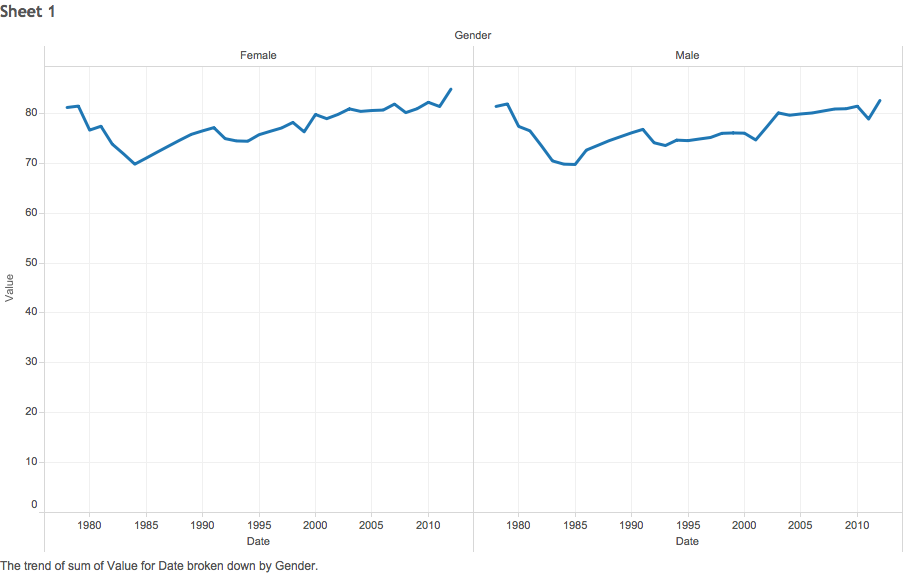

In [105]:
Image(filename='paiss6.png')

In [ ]:
'''Youth literacy age'''

In [106]:
# Again, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.ADT.1524.LT.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df12 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df12['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['country'])))
df12['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df12 = df12.dropna()
df12['Gender'] = 'Female'

In [107]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.ADT.1524.LT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df13 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df13['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['country'])))
df13['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df13 = df13.dropna()
df13['Gender'] = 'Male'

In [108]:
# I also look at both sexes.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df14 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df14['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['country'])))
df14['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df14 = df14.dropna()
df14['Gender'] = 'Both sexes'

In [109]:
'''I can now concatenate the three dataframes.'''
frames7 = [df12, df13, df14]
result7 = pd.concat(frames7)

In [110]:
# Firstly, I look at the data from the world.
world7 = result7[result7['country_cleaned'] == 'World']
world7.to_csv("world7.csv")

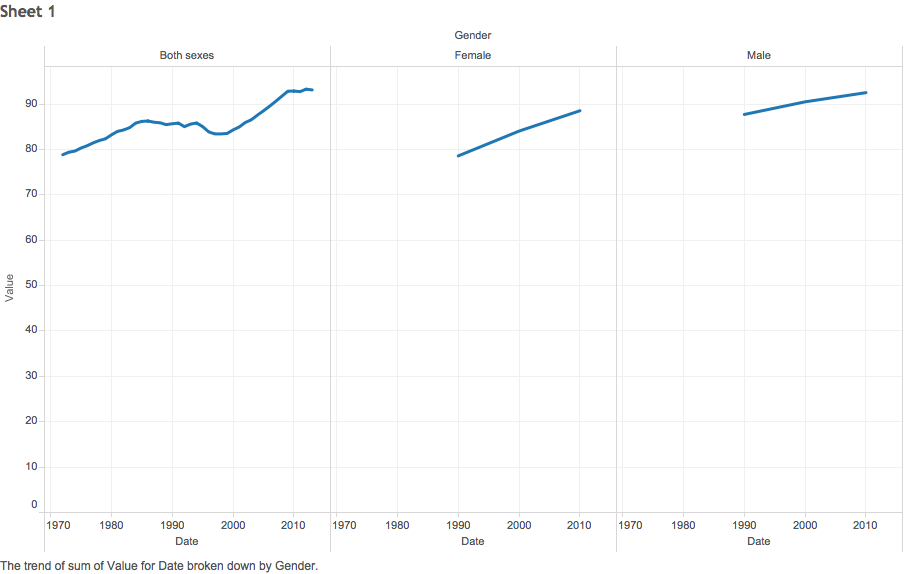

In [111]:
Image(filename='world7.png')

In [112]:
# I then look at East Asia & Pacific. 
eastasia7 = result7[result7['country_cleaned'] == 'East Asia & Pacific']
eastasia7['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [113]:
# I now want to look at Europe & Central Asia
europeca7 = result7[result7['country_cleaned'] == 'Europe & Central Asia']
europeca7['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [114]:
# I check for Latin America & Caribbean.
latamc7 = result7[result7['country_cleaned'] == 'Latin America & Caribbean']
latamc7['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [115]:
# I look at Middle East & North Africa.
mdena7 = result7[result7['country_cleaned'] == 'Middle East & North Africa']
mdena7['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [117]:
# South Asia
sasia7 = result7[result7['country_cleaned'] == 'South Asia']
sasia7.to_csv("sasia7.csv")

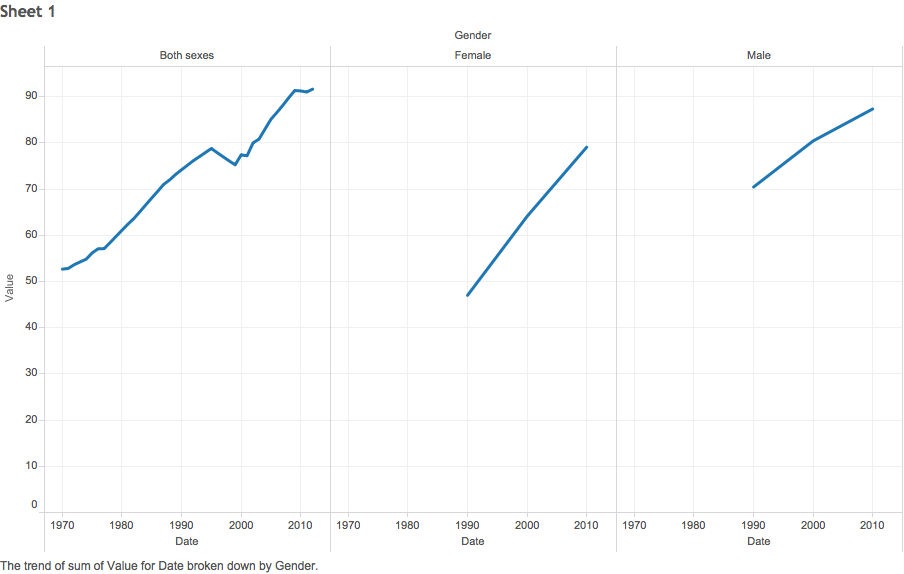

In [118]:
Image(filename='sasia7.png')

In [119]:
# I look at Sub Saharan Africa
ssafrica7 = result7[result7['country_cleaned'] == 'Sub Saharan Africa']
ssafrica7['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [120]:
# I now look at the Arab world.
arabworld7 = result7[result7['country_cleaned'] == 'Arab World']
arabworld7.to_csv("arabworld7.csv")

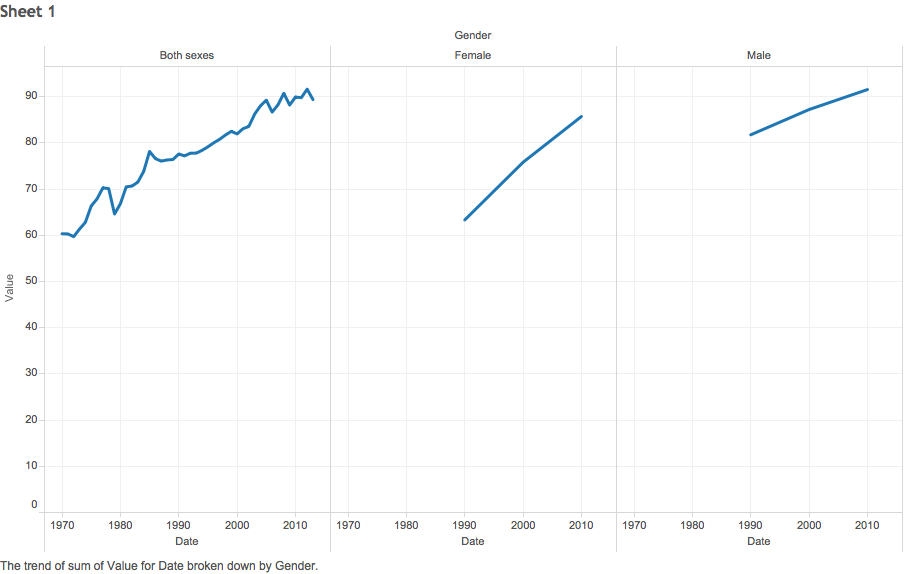

In [121]:
Image(filename='ssafrica7.png')

In [122]:
# Caribbean small states.
carss7 = result7[result7['country_cleaned'] == 'Caribbean small states']
carss7.to_csv("carss7.csv")

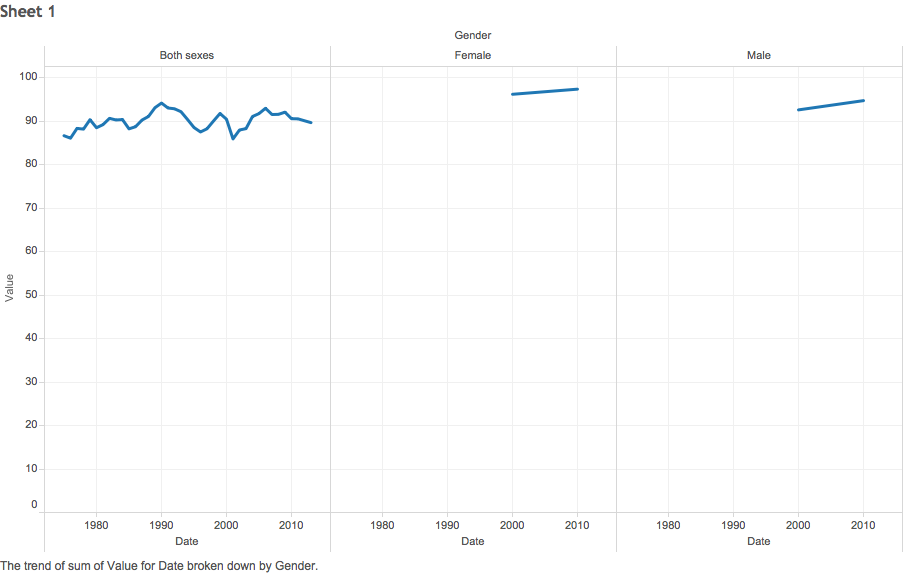

In [123]:
Image(filename='carss7.png')

In [124]:
# Central Europe and the Baltics
ceatb7 = result7[result7['country_cleaned'] == 'Central Europe and the Baltics']
ceatb7.to_csv("ceatb7.csv")

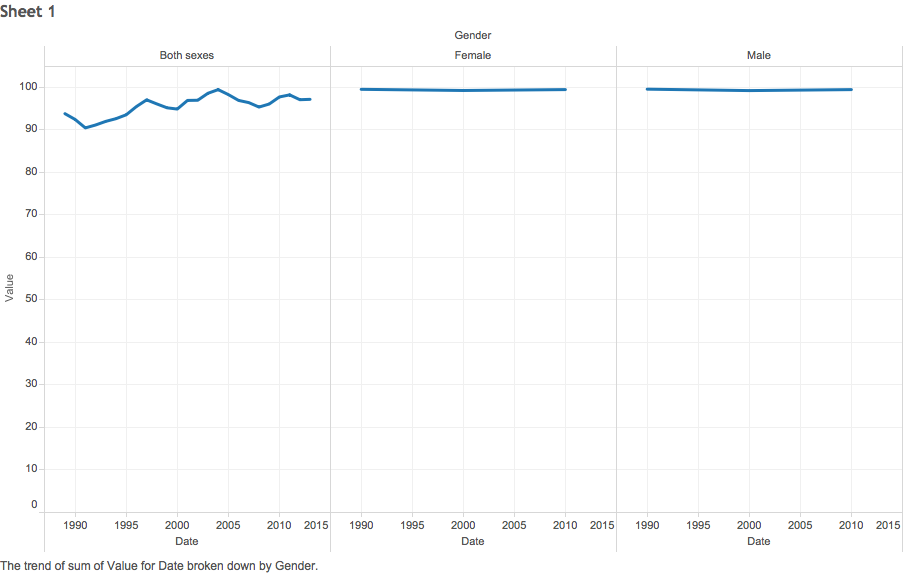

In [125]:
Image(filename='ceatb7.png')

In [126]:
# Euro area
euroa7 = result7[result7['country_cleaned'] == 'Euro area']
euroa7.to_csv("euroa7.csv")

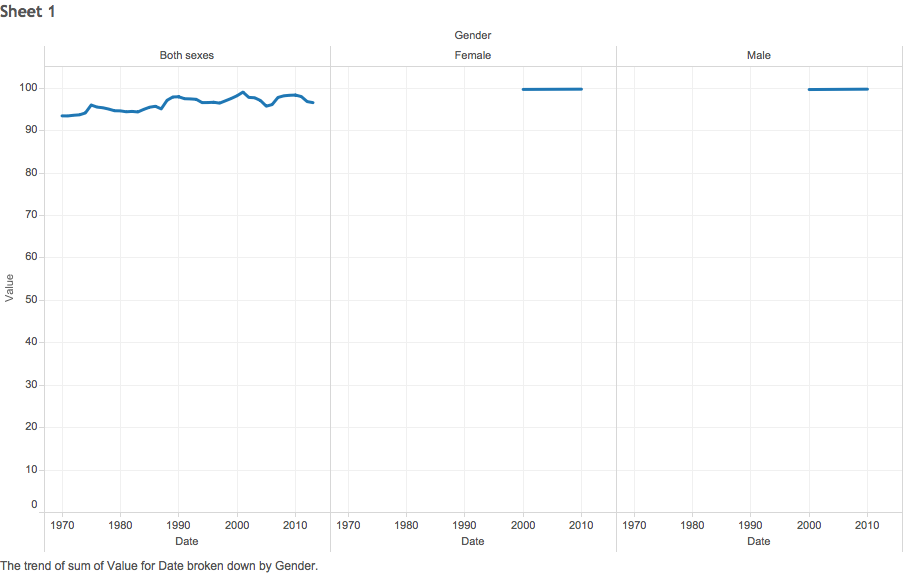

In [127]:
Image(filename='euroa7.png')

In [128]:
# European Union
eu7 = result7[result7['country_cleaned'] == 'European Union']
eu7.to_csv("eu7.csv")

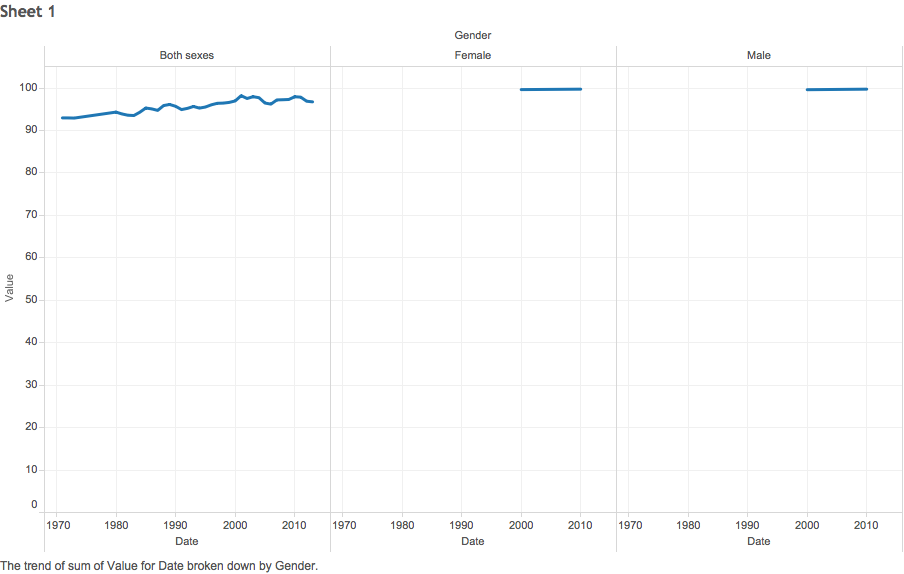

In [129]:
Image(filename='eu7.png')

In [130]:
# Fragile and conflict affected situations
frcas7 = result7[result7['country_cleaned'] == 'Fragile and conflict affected situations']
frcas7.to_csv("frcas7.csv")

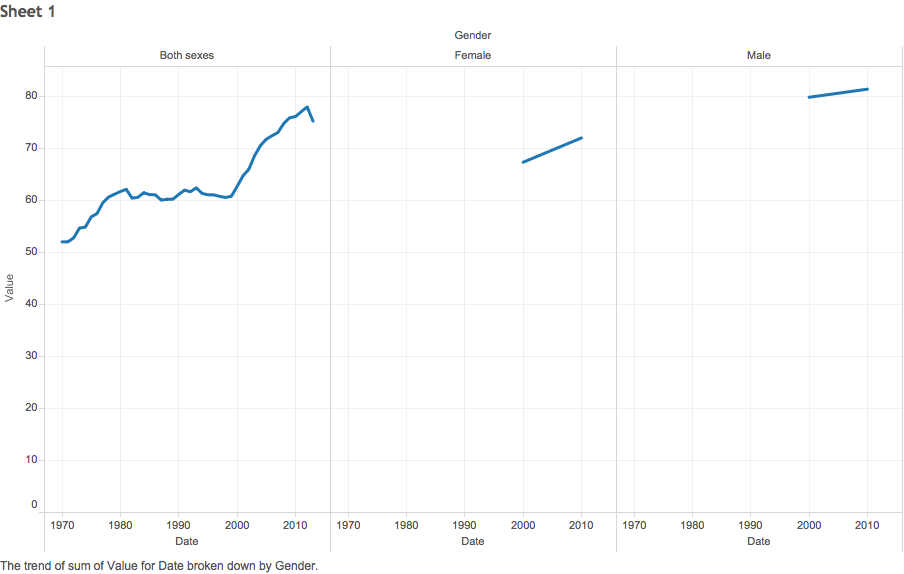

In [131]:
Image(filename='frcas7.png')

In [132]:
# Pacific island small states
paiss7 = result7[result7['country_cleaned'] == 'Pacific island small states']
paiss7.to_csv("paiss7.csv")

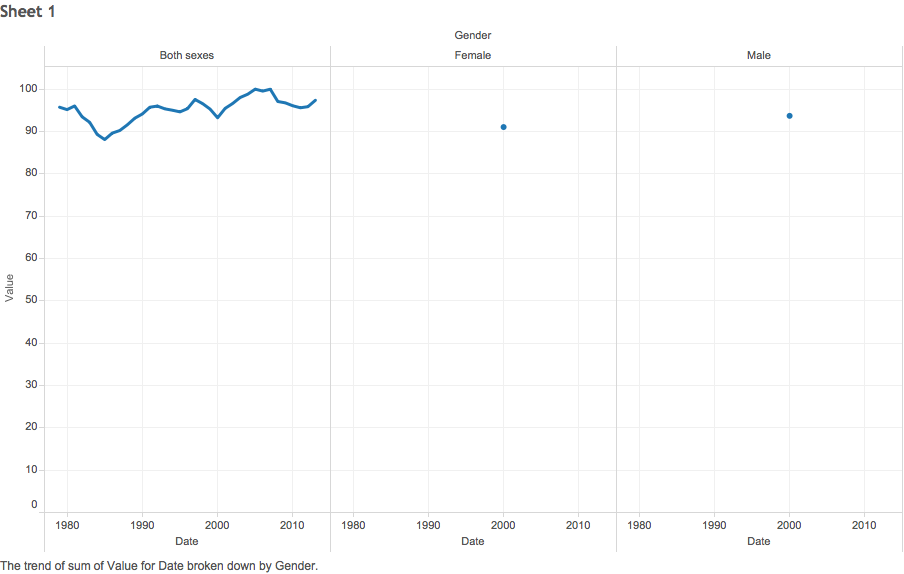

In [133]:
Image(filename='paiss7.png')

In [ ]:
'''I want to look at the Effective Transition from Primary to Secondary'''

In [3]:
# Again, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.SEC.PROG.FE.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df15 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df15['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['country'])))
df15['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df15 = df15.dropna()
df15['Gender'] = 'Female'

In [4]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.SEC.PROG.MA.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df16 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df16['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['country'])))
df16['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df16 = df16.dropna()
df16['Gender'] = 'Male'

In [5]:
# I now concatenate the two dataframes.
frames8 = [df15, df16]
result8 = pd.concat(frames8)

In [6]:
# Firstly, I look at the data from the world.
world8 = result8[result8['country_cleaned'] == 'World']
world8.to_csv("world8.csv")

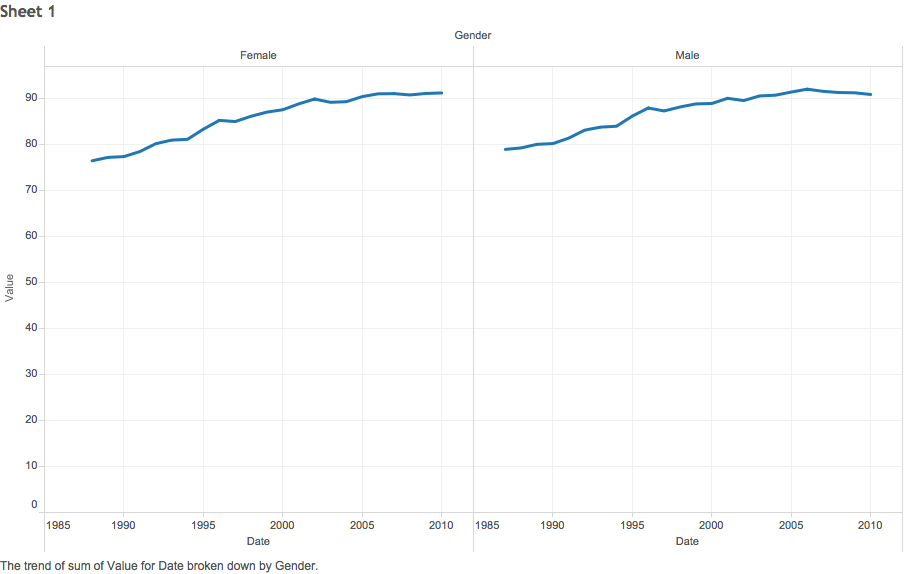

In [7]:
Image(filename='world8.png')

In [8]:
# I then look at East Asia & Pacific. 
eastasia8 = result8[result8['country_cleaned'] == 'East Asia & Pacific']
eastasia8['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [9]:
# I now want to look at Europe & Central Asia
europeca8 = result8[result8['country_cleaned'] == 'Europe & Central Asia']
europeca8['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [10]:
# I check for Latin America & Caribbean.
latamc8 = result8[result8['country_cleaned'] == 'Latin America & Caribbean']
latamc8['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [11]:
# I look at Middle East & North Africa.
mdena8 = result8[result8['country_cleaned'] == 'Middle East & North Africa']
mdena8['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [13]:
# South Asia
sasia8 = result8[result8['country_cleaned'] == 'South Asia']
sasia8.to_csv("sasia8.csv")

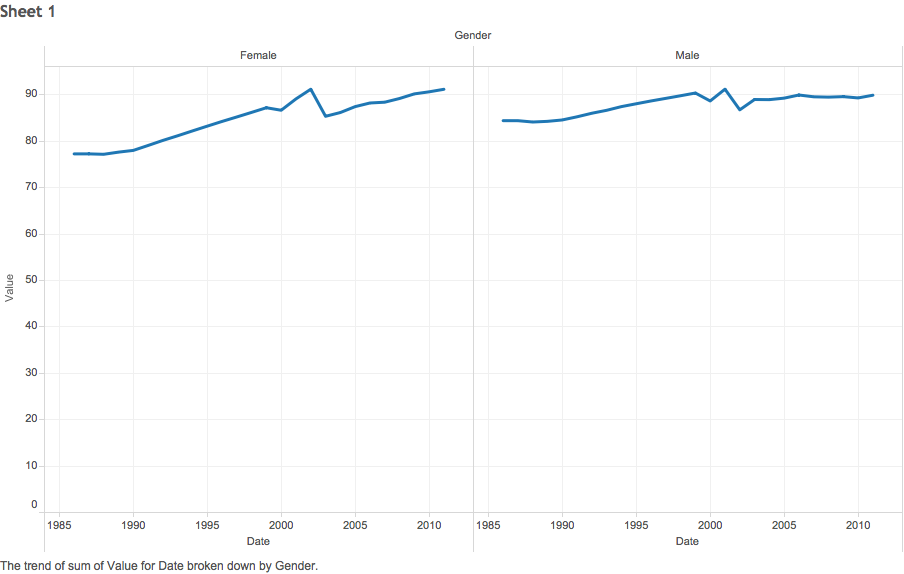

In [14]:
Image(filename='sasia8.png')

In [15]:
# I look at Sub Saharan Africa
ssafrica8 = result8[result8['country_cleaned'] == 'Sub Saharan Africa']
ssafrica8['country_cleaned'].value_counts()
# Empty

Series([], Name: country_cleaned, dtype: int64)

In [17]:
# I now look at the Arab world.
arabworld8 = result8[result8['country_cleaned'] == 'Arab World']
arabworld8.to_csv("arabworld8.csv")

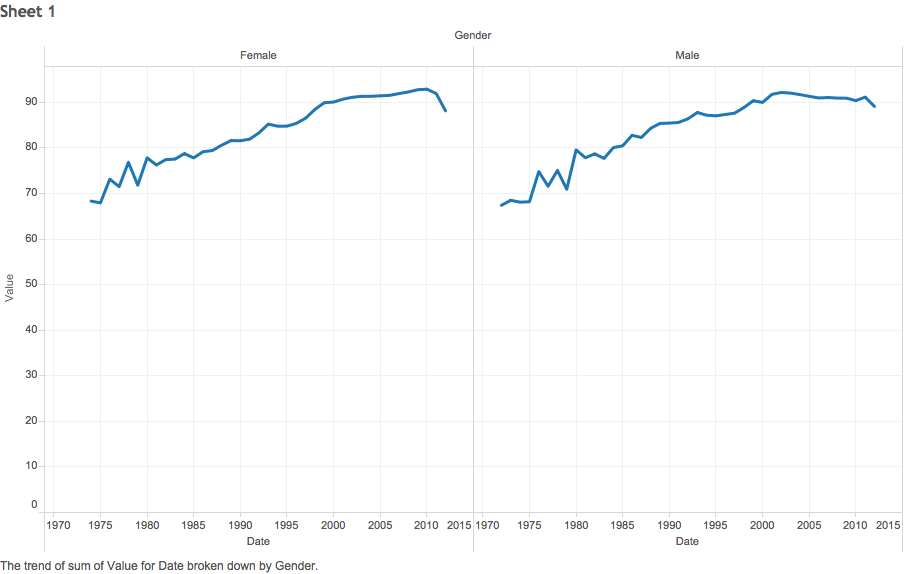

In [18]:
Image(filename='arabworld8.png')

In [19]:
# Caribbean small states.
carss8 = result8[result8['country_cleaned'] == 'Caribbean small states']
carss8.to_csv("carss8.csv")

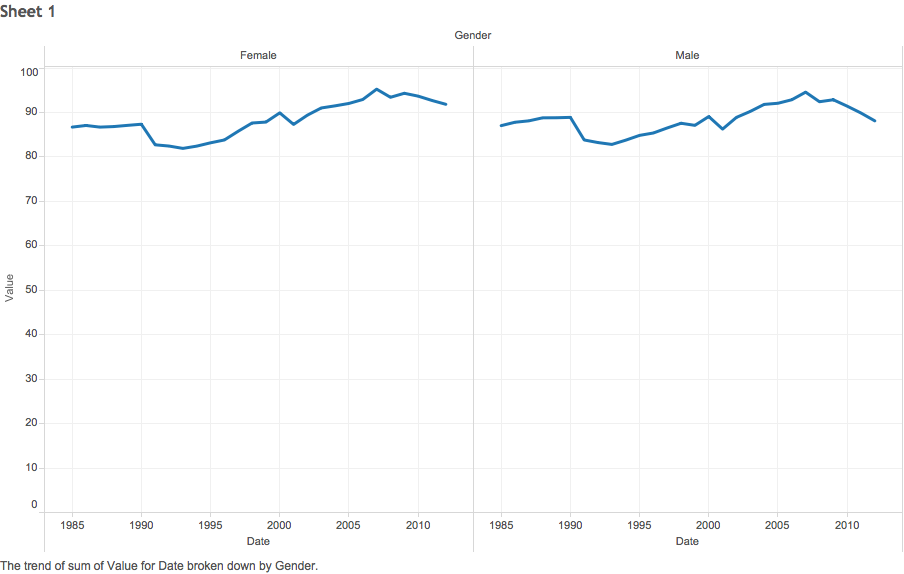

In [20]:
Image(filename='carss8.png')

In [21]:
# Central Europe and the Baltics
ceatb8 = result8[result8['country_cleaned'] == 'Central Europe and the Baltics']
ceatb8.to_csv("ceatb8.csv")

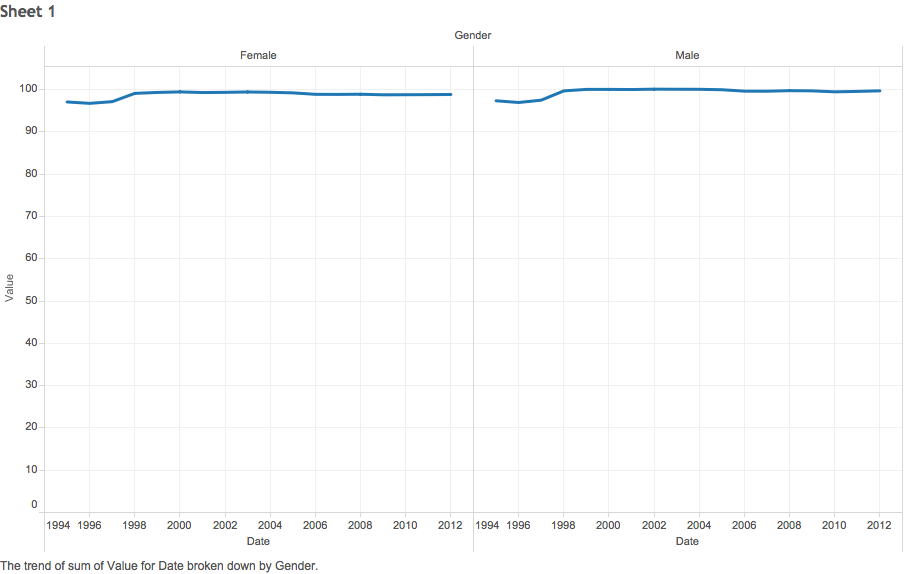

In [22]:
Image(filename='ceatb8.png')

In [23]:
# Euro area
euroa8 = result8[result8['country_cleaned'] == 'Euro area']
euroa8.to_csv("euroa8.csv")

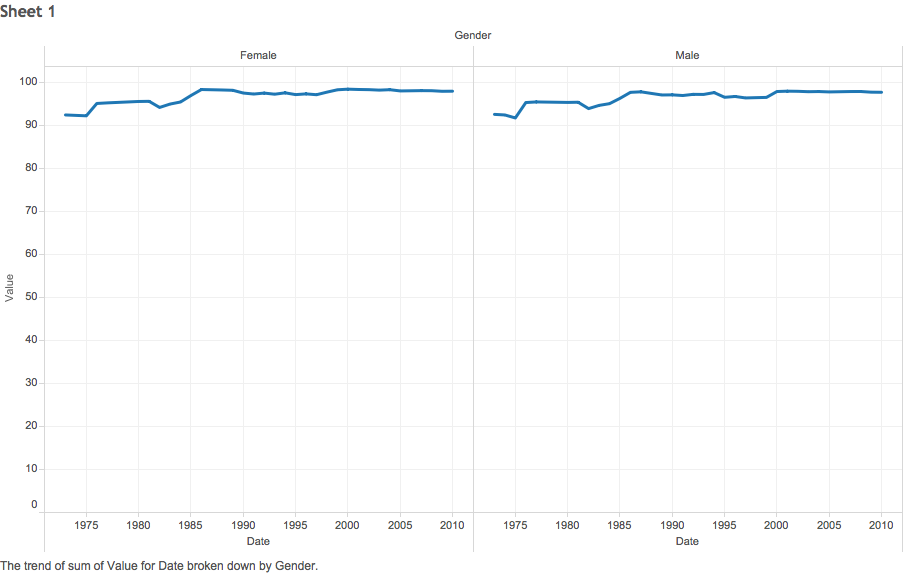

In [24]:
Image(filename='euroa8.png')

In [25]:
# European Union
eu8 = result8[result8['country_cleaned'] == 'European Union']
eu8.to_csv("eu8.csv")

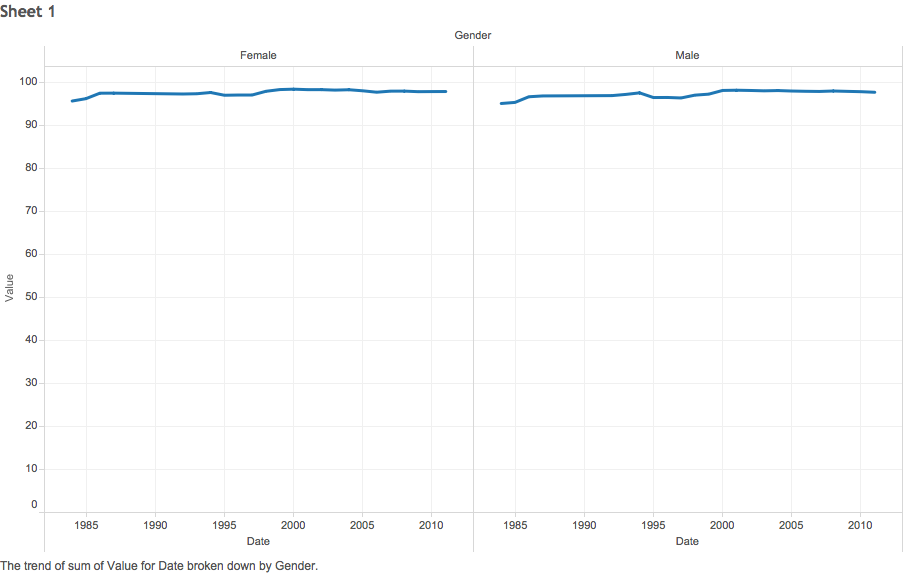

In [26]:
Image(filename='eu8.png')

In [27]:
# Fragile and conflict affected situations
frcas8 = result8[result8['country_cleaned'] == 'Fragile and conflict affected situations']
frcas8.to_csv("frcas8.csv")

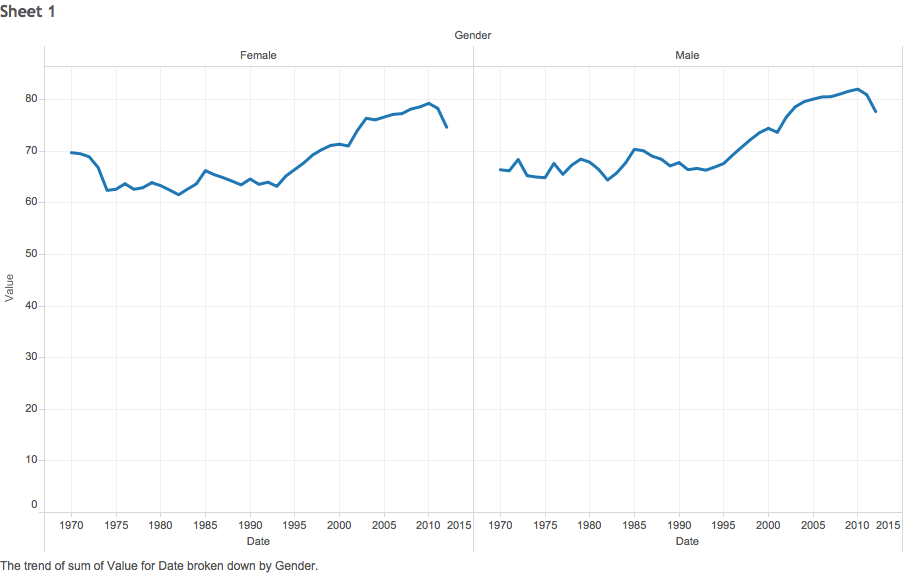

In [28]:
Image(filename='frcas8.png')

In [29]:
# Pacific island small states
paiss8 = result8[result8['country_cleaned'] == 'Pacific island small states']
paiss8.to_csv("paiss8.csv")

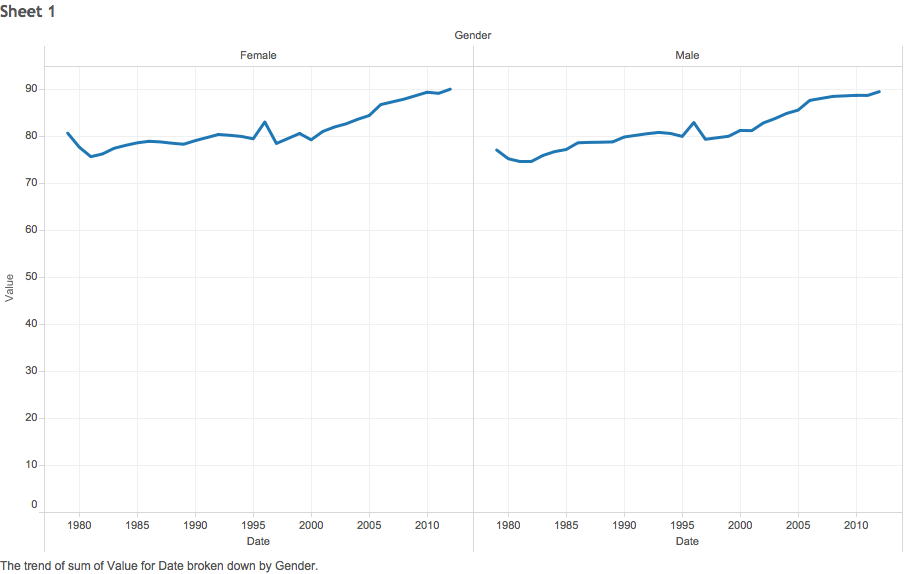

In [30]:
Image(filename='paiss8.png')